In [1]:
  !pip install matplotlib seaborn
%pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, uniform
import numpy as np
from scipy.stats import kurtosis
import numpy as np
from scipy import stats
import warnings
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
len(df)

265627

In [4]:
df.columns

Index(['Event', 'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
       'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [5]:
display(df)

Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
265622  265623  707951.44           41  6.826629  7.133022  1.474081   
265623  265624  708145.44           45  6.787791  7.154026  0.116755   
265624  265625  708398.44           41  6.889866  7.141219  0.684921   
265625  265626  708585.44           39  6.865218  7.144353  0.288761   
265626  265627  709122.44           41  6.887820  7.127359  0.360753   

           CD133      CD19      CD22     CD11b  ...     CD117     CD49d  \
0      -0.029585 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505   
1      -0.038280 -0.016654  0.074409  0.808031  ...  0.089660  0.197818   
2      -0.032216  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670   
3      -0.027611 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669   
4      -0.030297  0.080423  0.495791  1.107627  ... -0.006223  0.180924   
...          ...       ...       ...       ...  ...       ...       ...   
265622 -0.019174 -0.055620 -0.007261  0.063395  ... -0.011105  0.533736   
265623 -0.056213 -0.008864 -0.035158 -0.041845  ...  0.143869  1.269464   
265624 -0.006264 -0.026111 -0.030837 -0.034641  ...  0.087102 -0.055912   
265625 -0.011310 -0.048786  0.073983 -0.031787  ... -0.047971  0.101955   
265626  0.128604 -0.006934  0.109846  3.864711  ...  0.080195  0.037962   

          HLA-DR      CD64      CD41  Viability  file_number  event_number  \
0       1.664480 -0.005376 -0.001961   0.648429     3.627711           307   
1       0.491592  0.144814  0.868014   0.561384     3.627711           545   
2       1.308337 -0.010961 -0.010413   0.643337     3.627711          1726   
3       0.140523 -0.013449 -0.026039  -0.026523     3.627711          1766   
4       0.197332  0.076167 -0.040488   0.283287     3.627711          2031   
...          ...       ...       ...        ...          ...           ...   
265622  0.123758 -0.042495 -0.027971   0.236957     3.669327        102686   
265623  0.047215 -0.008000 -0.025811  -0.003500     3.669327        102690   
265624  0.501536  0.053884 -0.042602   0.107206     3.669327        102701   
265625  6.200001  0.296877  0.192786   0.620872     3.669327        102706   
265626  3.675123 -0.000878 -0.052526   0.310466     3.669327        102720   

        label  individual  
0         1.0           1  
1         1.0           1  
2         1.0           1  
3         1.0           1  
4         1.0           1  
...       ...         ...  
265622    NaN           2  
265623    NaN           2  
265624    NaN           2  
265625    NaN           2  
265626    NaN           2  

[265627 rows x 42 columns]

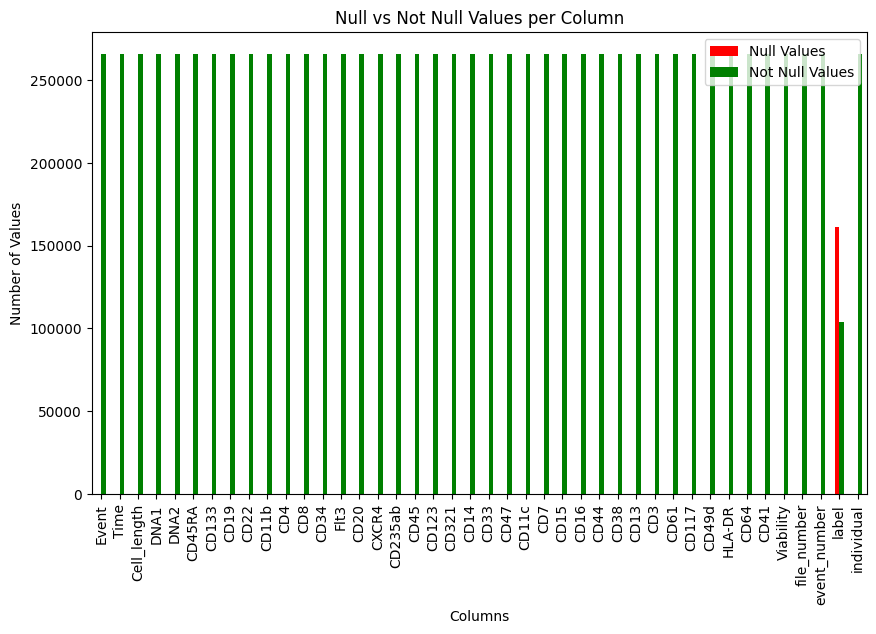

In [6]:

null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

null_vs_notnull = pd.DataFrame({
    'Null Values': null_counts,
    'Not Null Values': not_null_counts
})

null_vs_notnull.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])

plt.title('Null vs Not Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=90)

plt.show()

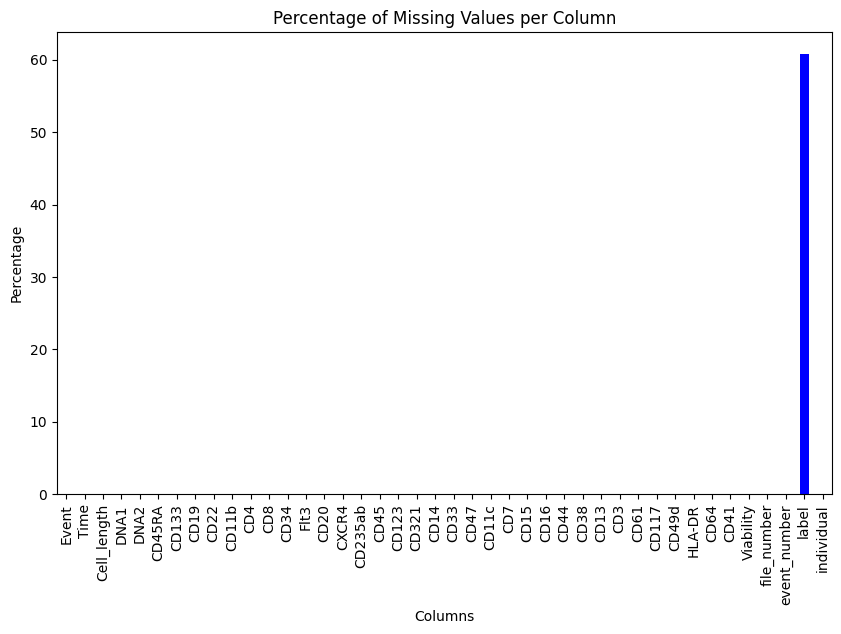

In [7]:
missing_percentage = df.isnull().mean() * 100
missing_percentage.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [8]:
df.describe()

Event           Time    Cell_length           DNA1  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean   132814.000000  272948.345014      34.450572       4.606956   
std     76680.054314  171220.139430      11.446694       1.312831   
min         1.000000       1.000000      10.000000       2.786488   
25%     66407.500000  120196.000000      26.000000       3.700023   
50%    132814.000000  253276.000000      33.000000       4.022127   
75%    199220.500000  424502.500000      41.000000       6.353313   
max    265627.000000  709122.440000      65.000000       7.001489   

                DNA2         CD45RA          CD133           CD19  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        5.198308       0.688127       0.145960       0.509301   
std         1.150357       0.609105       0.259267       0.857462   
min         2.236450      -0.057305      -0.058081      -0.058089   
25%         4.407822       0.204625      -0.022935      -0.018838   
50%         4.698415       0.549387       0.025353       0.075210   
75%         6.766268       1.031198       0.224299       0.548386   
max         7.472308       6.691197       5.527494       4.990085   

                CD22          CD11b  ...          CD117          CD49d  \
count  265627.000000  265627.000000  ...  265627.000000  265627.000000   
mean        0.397323       0.710319  ...       0.131199       0.794938   
std         0.762126       1.011434  ...       0.313208       0.627619   
min        -0.057342      -0.058236  ...      -0.057668      -0.058064   
25%        -0.020689      -0.000294  ...      -0.023957       0.283013   
50%         0.058790       0.257923  ...      -0.000410       0.677212   
75%         0.386481       0.923517  ...       0.154736       1.190787   
max         5.160477       5.260789  ...       5.502125       5.153438   

              HLA-DR           CD64           CD41      Viability  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        1.521812       0.551512       0.261754       0.570037   
std         1.694211       0.888739       0.617065       0.589738   
min        -0.057974      -0.058199      -0.058244      -0.057979   
25%         0.057709      -0.010582      -0.020166       0.065523   
50%         0.611335       0.122493       0.052229       0.398230   
75%         2.888240       0.604131       0.305591       0.931058   
max         7.052507       4.517843       7.718288       2.433031   

         file_number   event_number          label     individual  
count  265627.000000  265627.000000  104184.000000  265627.000000  
mean        3.639348  171288.314234       8.116102       1.279625  
std         0.018678  123904.361456       2.457486       0.448816  
min         3.627711       1.000000       1.000000       1.000000  
25%         3.627711   58679.500000       7.000000       1.000000  
50%         3.627711  152783.000000       8.000000       1.000000  
75%         3.669327  282369.000000      10.000000       2.000000  
max         3.669327  400112.000000      14.000000       2.000000  

[8 rows x 42 columns]

### new_df

In [9]:
new_df = df.drop(['Event','Time','file_number','event_number','individual'],axis=1)

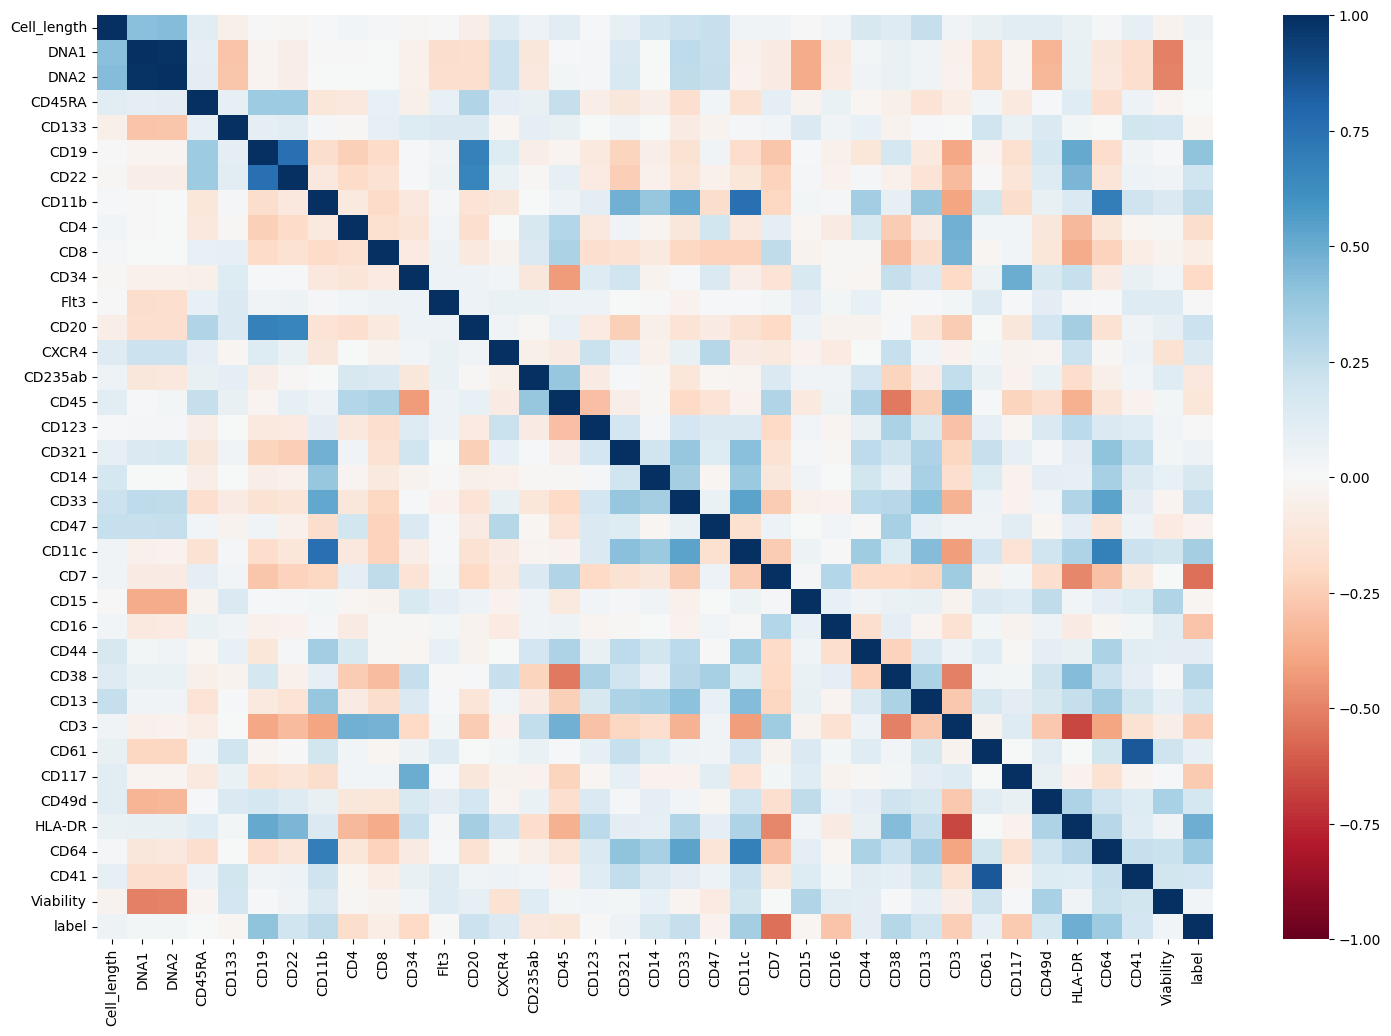

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(new_df.corr(),cmap='RdBu',vmin= -1,vmax=1)
plt.show()

In [11]:
descriptive_stats = df.describe()


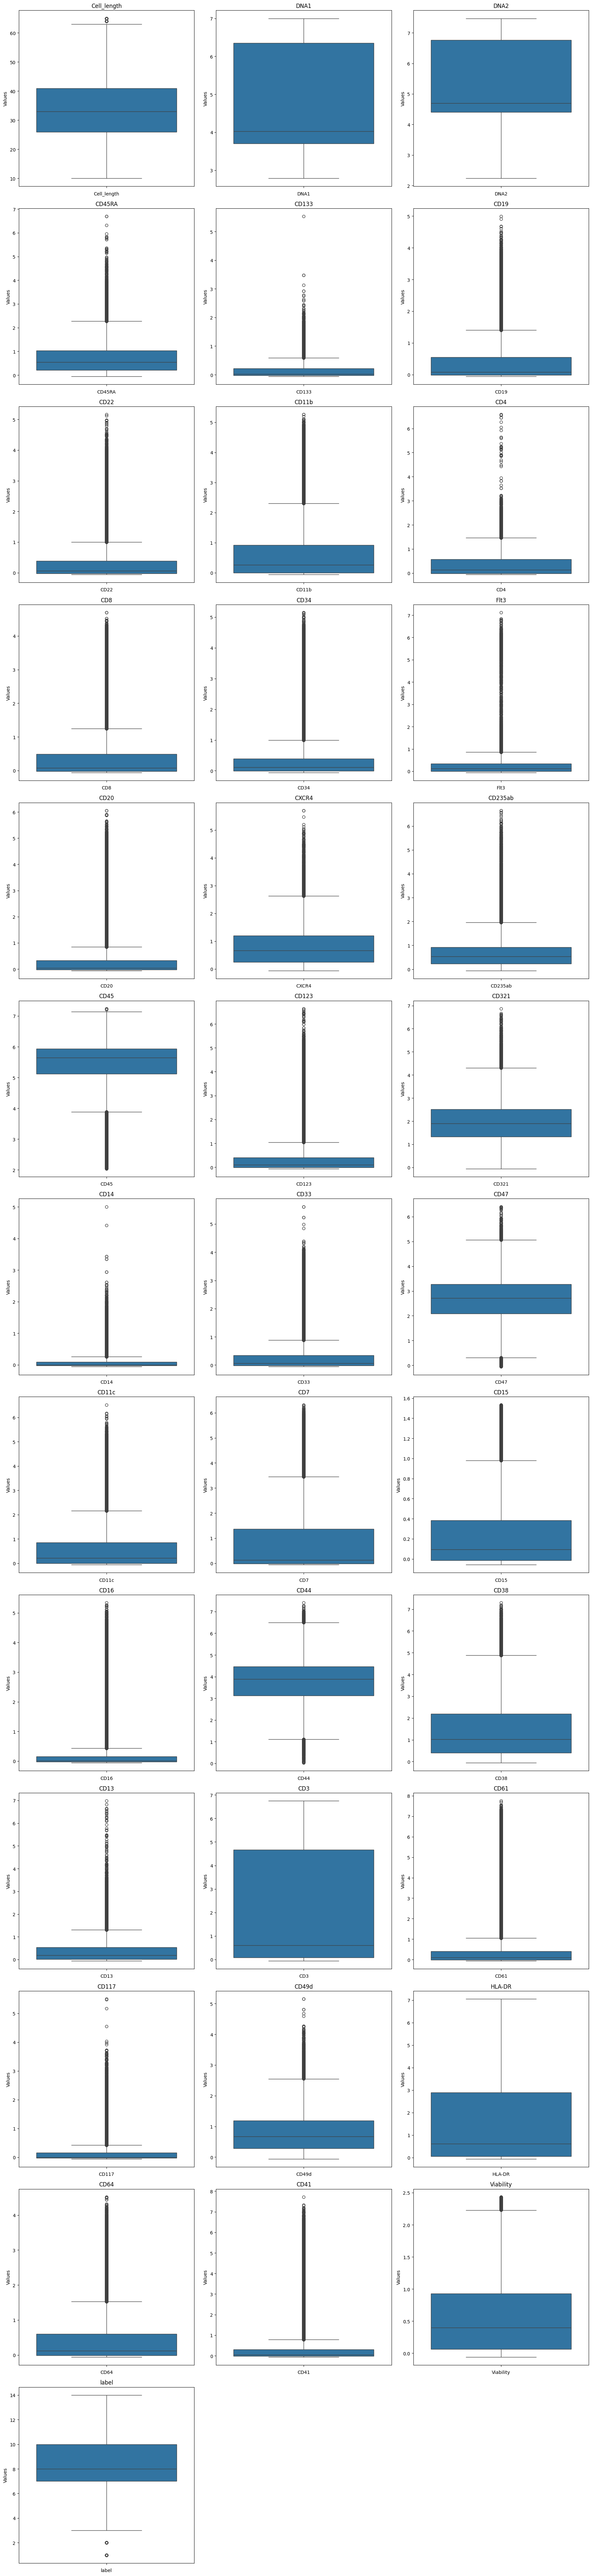

In [12]:
num_features = len(new_df.columns)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()

# Loop through each feature and plot the boxplot
for i, feature in enumerate(new_df.columns):
    sns.boxplot(data=new_df[feature], ax=axes[i])
    axes[i].set_title(f'{feature}', fontsize=12)
    axes[i].set_xlabel(f'{feature}', fontsize=10)
    axes[i].set_ylabel('Values', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to make it more readable
plt.tight_layout()
plt.show()


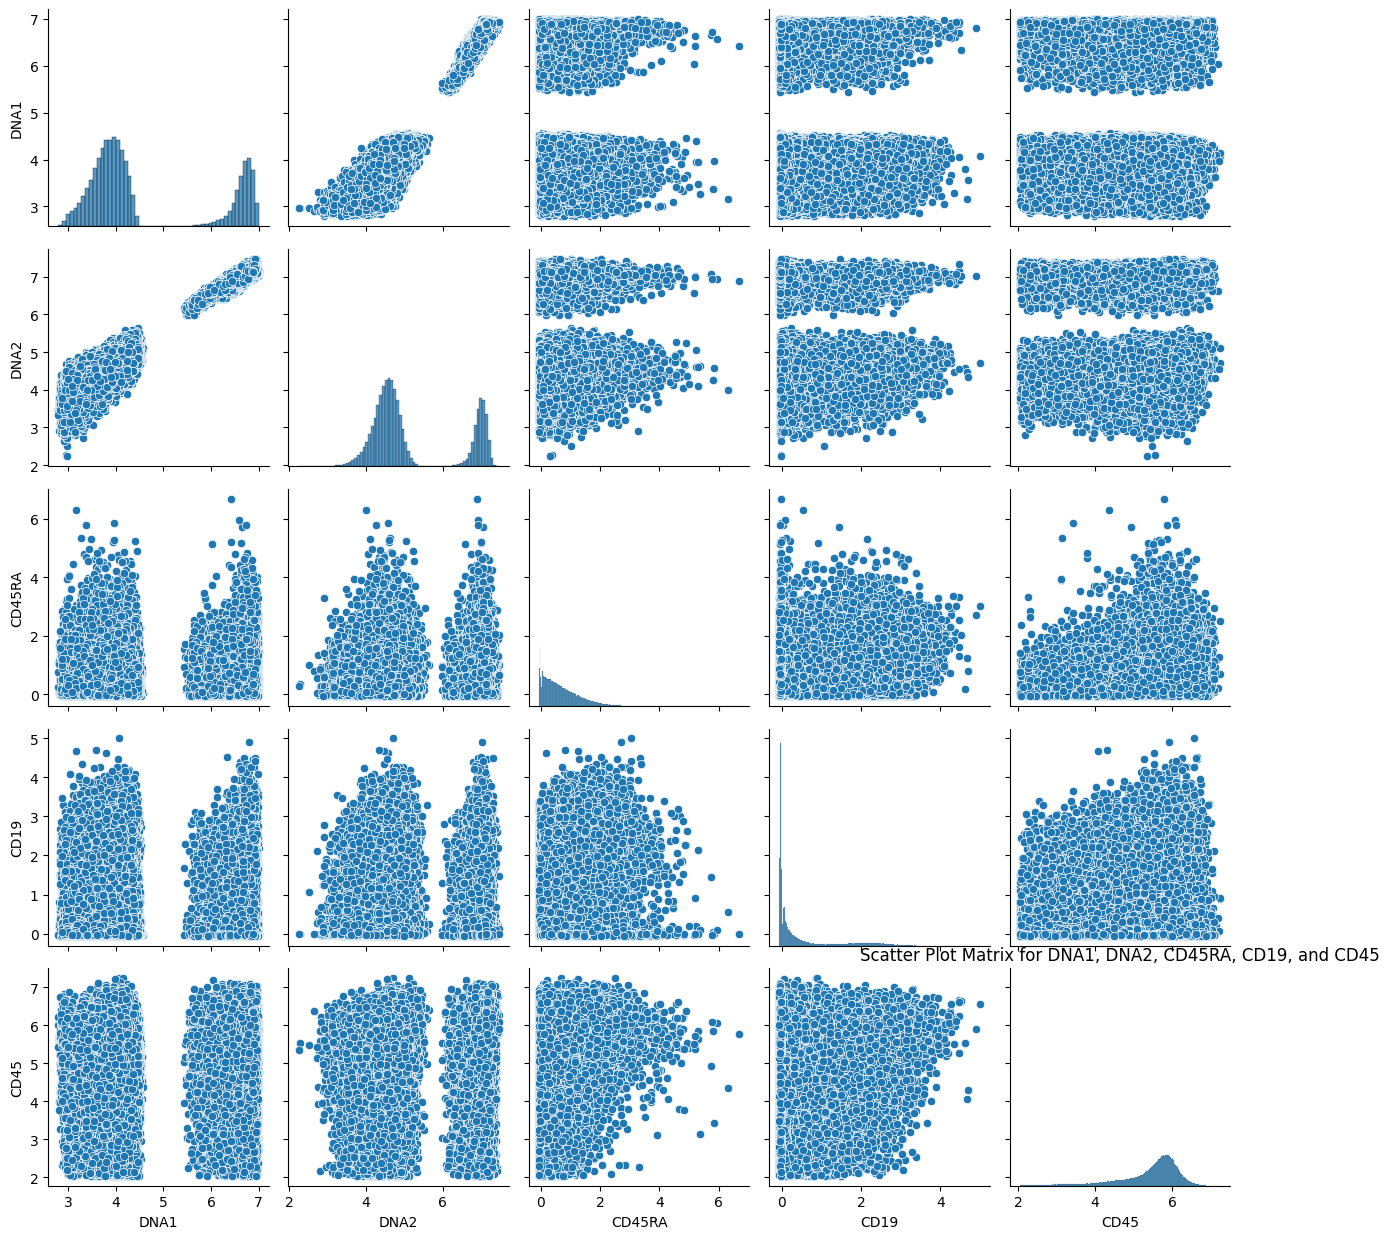

In [13]:

warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(df[['DNA1', 'DNA2', 'CD45RA', 'CD19', 'CD45']])

plt.tight_layout()
plt.title('Scatter Plot Matrix for DNA1, DNA2, CD45RA, CD19, and CD45')
plt.show()

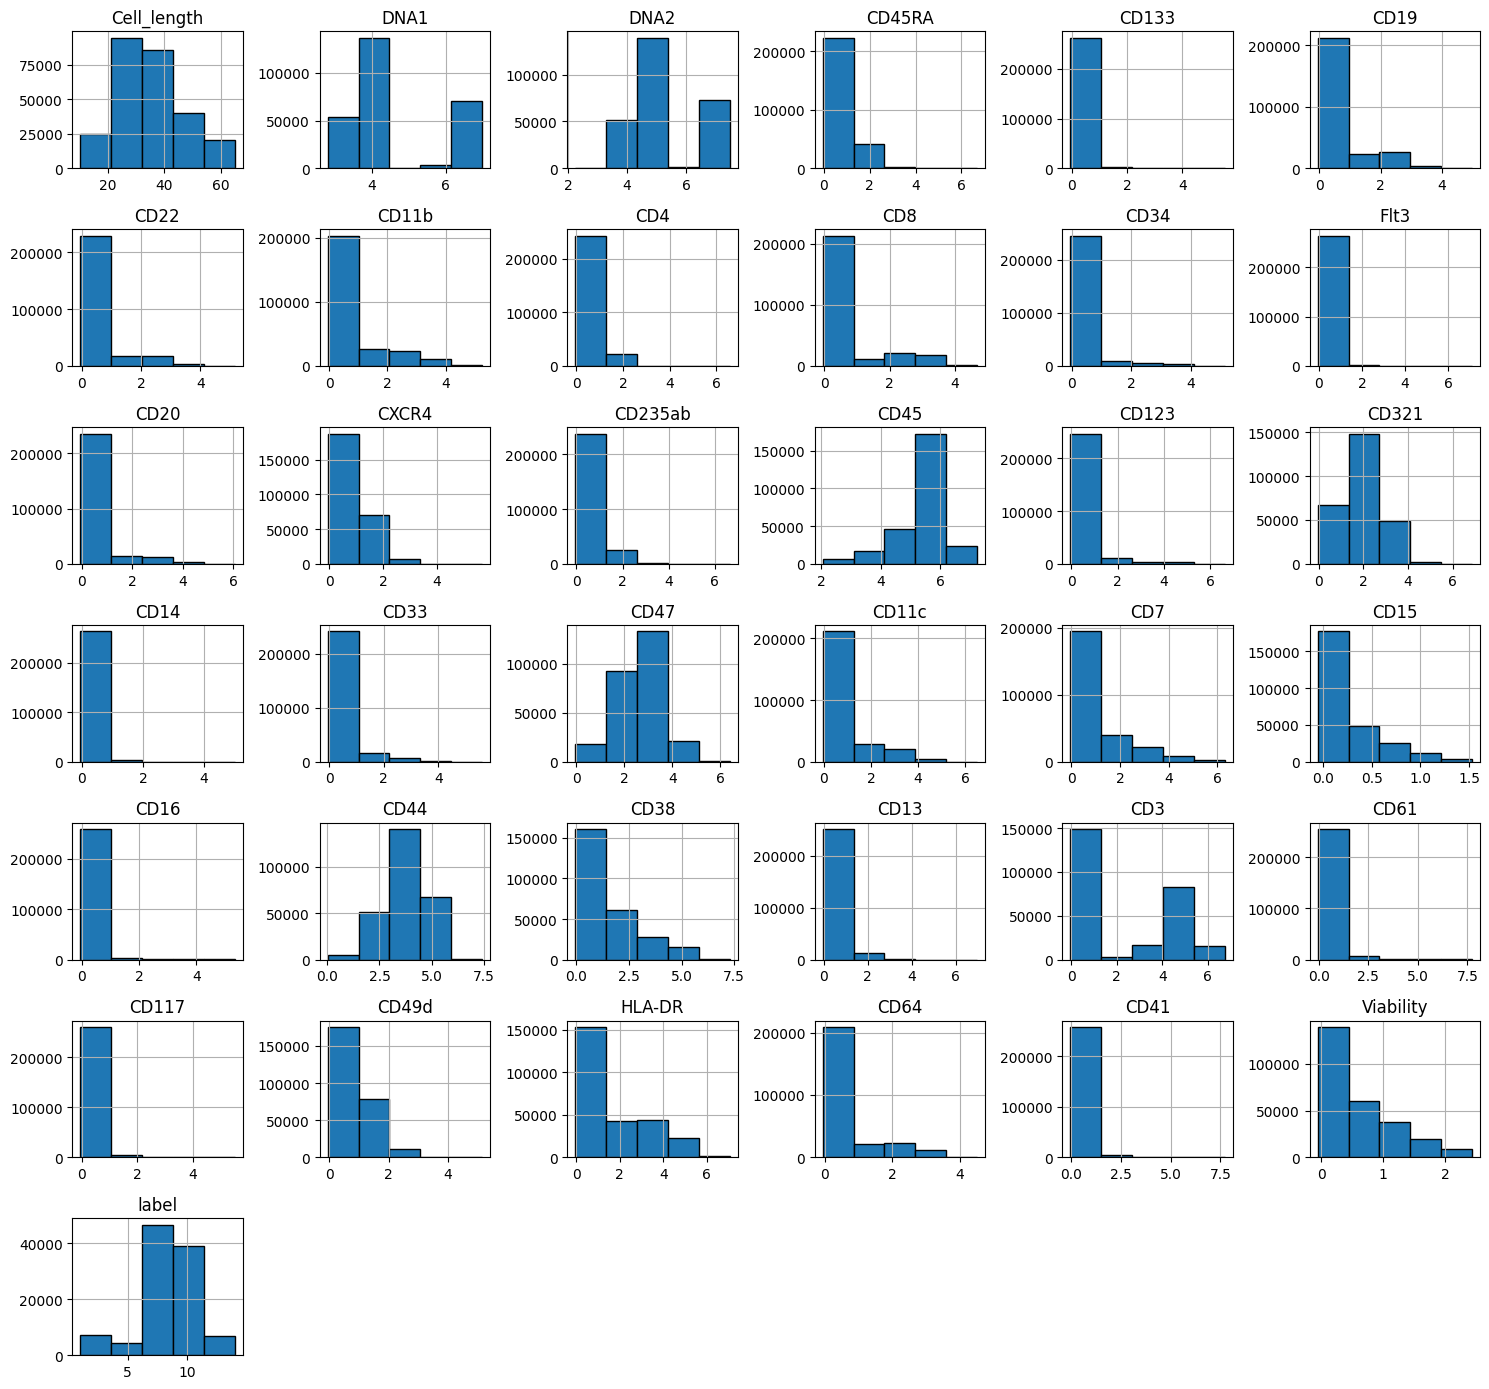

In [14]:
new_df.hist(figsize=(15,14), bins=5,edgecolor='black')

plt.tight_layout()
plt.show()

In [15]:
z_scores = np.abs(stats.zscore(new_df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=1)
outlier_count = (outliers > 0).sum()
print(f"\nNumber of rows with outliers (Z-score > 3): {outlier_count}")


Number of rows with outliers (Z-score > 3): 92238


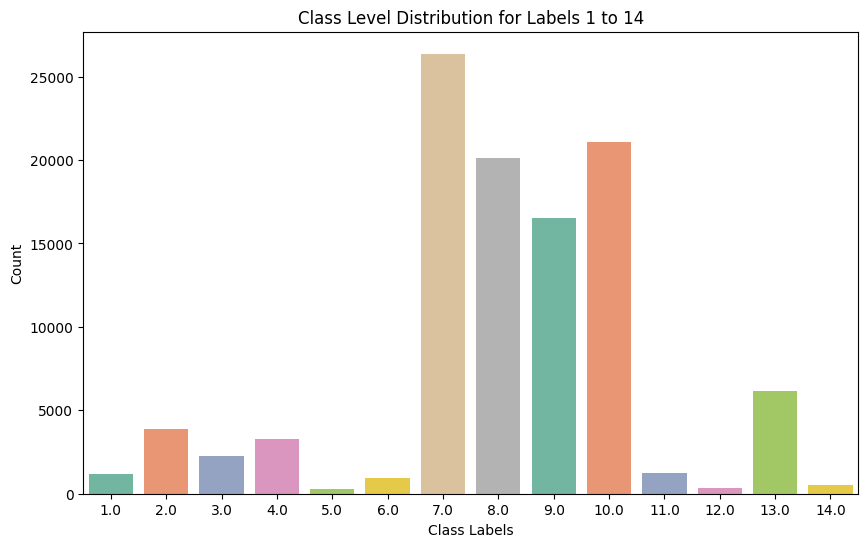

Class-level distribution (1 to 14):
label
1.0      1207
2.0      3905
3.0      2248
4.0      3295
5.0       304
6.0       916
7.0     26366
8.0     20108
9.0     16520
10.0    21099
11.0     1238
12.0      330
13.0     6135
14.0      513
Name: count, dtype: int64


In [16]:

# Filter the dataset to only include labels from 1 to 14
filtered_df = df[df['label'].isin(range(1, 15))]

# Count the occurrences of each class (1 to 14)
class_counts = filtered_df['label'].value_counts().sort_index()

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Add titles and labels
plt.title('Class Level Distribution for Labels 1 to 14')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print the class distribution
print("Class-level distribution (1 to 14):")
print(class_counts)


In [17]:
# Calculate the minimum and maximum values for each feature
min_values = new_df.min()
max_values = new_df.max()

# Combine the min and max values into a DataFrame
min_max_df = pd.DataFrame({
    'Min Value': min_values,
    'Max Value': max_values
})

# Display the DataFrame in a more formatted and styled way
styled_min_max_df = min_max_df.style.set_properties(**{
    'background-color': 'lightyellow',
    'color': 'black',
    'border-color': 'black',
    'text-align': 'center'
}).set_caption("Minimum and Maximum Values for Each Feature").format("{:.2f}")

# Show the styled DataFrame
styled_min_max_df


In [18]:
skewness = new_df.skew()
kurtosis_values = new_df.apply(lambda x: kurtosis(x, fisher=False))

In [19]:
skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values
})

In [20]:
print("Skewness and Kurtosis for each feature:")
print(skew_kurt_df)

Skewness and Kurtosis for each feature:
             Skewness   Kurtosis
Cell_length  0.527835   2.834033
DNA1         0.845015   1.994037
DNA2         0.779171   1.975021
CD45RA       1.191601   4.964272
CD133        2.141965   9.190066
CD19         1.682619   4.590887
CD22         2.283194   7.500223
CD11b        1.679098   4.964495
CD4          1.622053   5.844261
CD8          1.775723   4.745776
CD34         3.492457  16.596416
Flt3         7.098191  85.583534
CD20         2.754715  10.435449
CXCR4        0.955347   3.936307
CD235ab      2.001491  13.440586
CD45        -1.484832   5.246770
CD123        3.648911  18.361217
CD321        0.247098   2.914593
CD14         3.609026  23.062535
CD33         2.724993  10.967536
CD47        -0.250324   2.943834
CD11c        1.733898   5.117156
CD7          1.606537   4.885115
CD15         1.445155   4.504387
CD16         5.733236  42.287749
CD44        -0.431592   2.918792
CD38         1.141488   3.521190
CD13         2.234324  10.637564
CD3

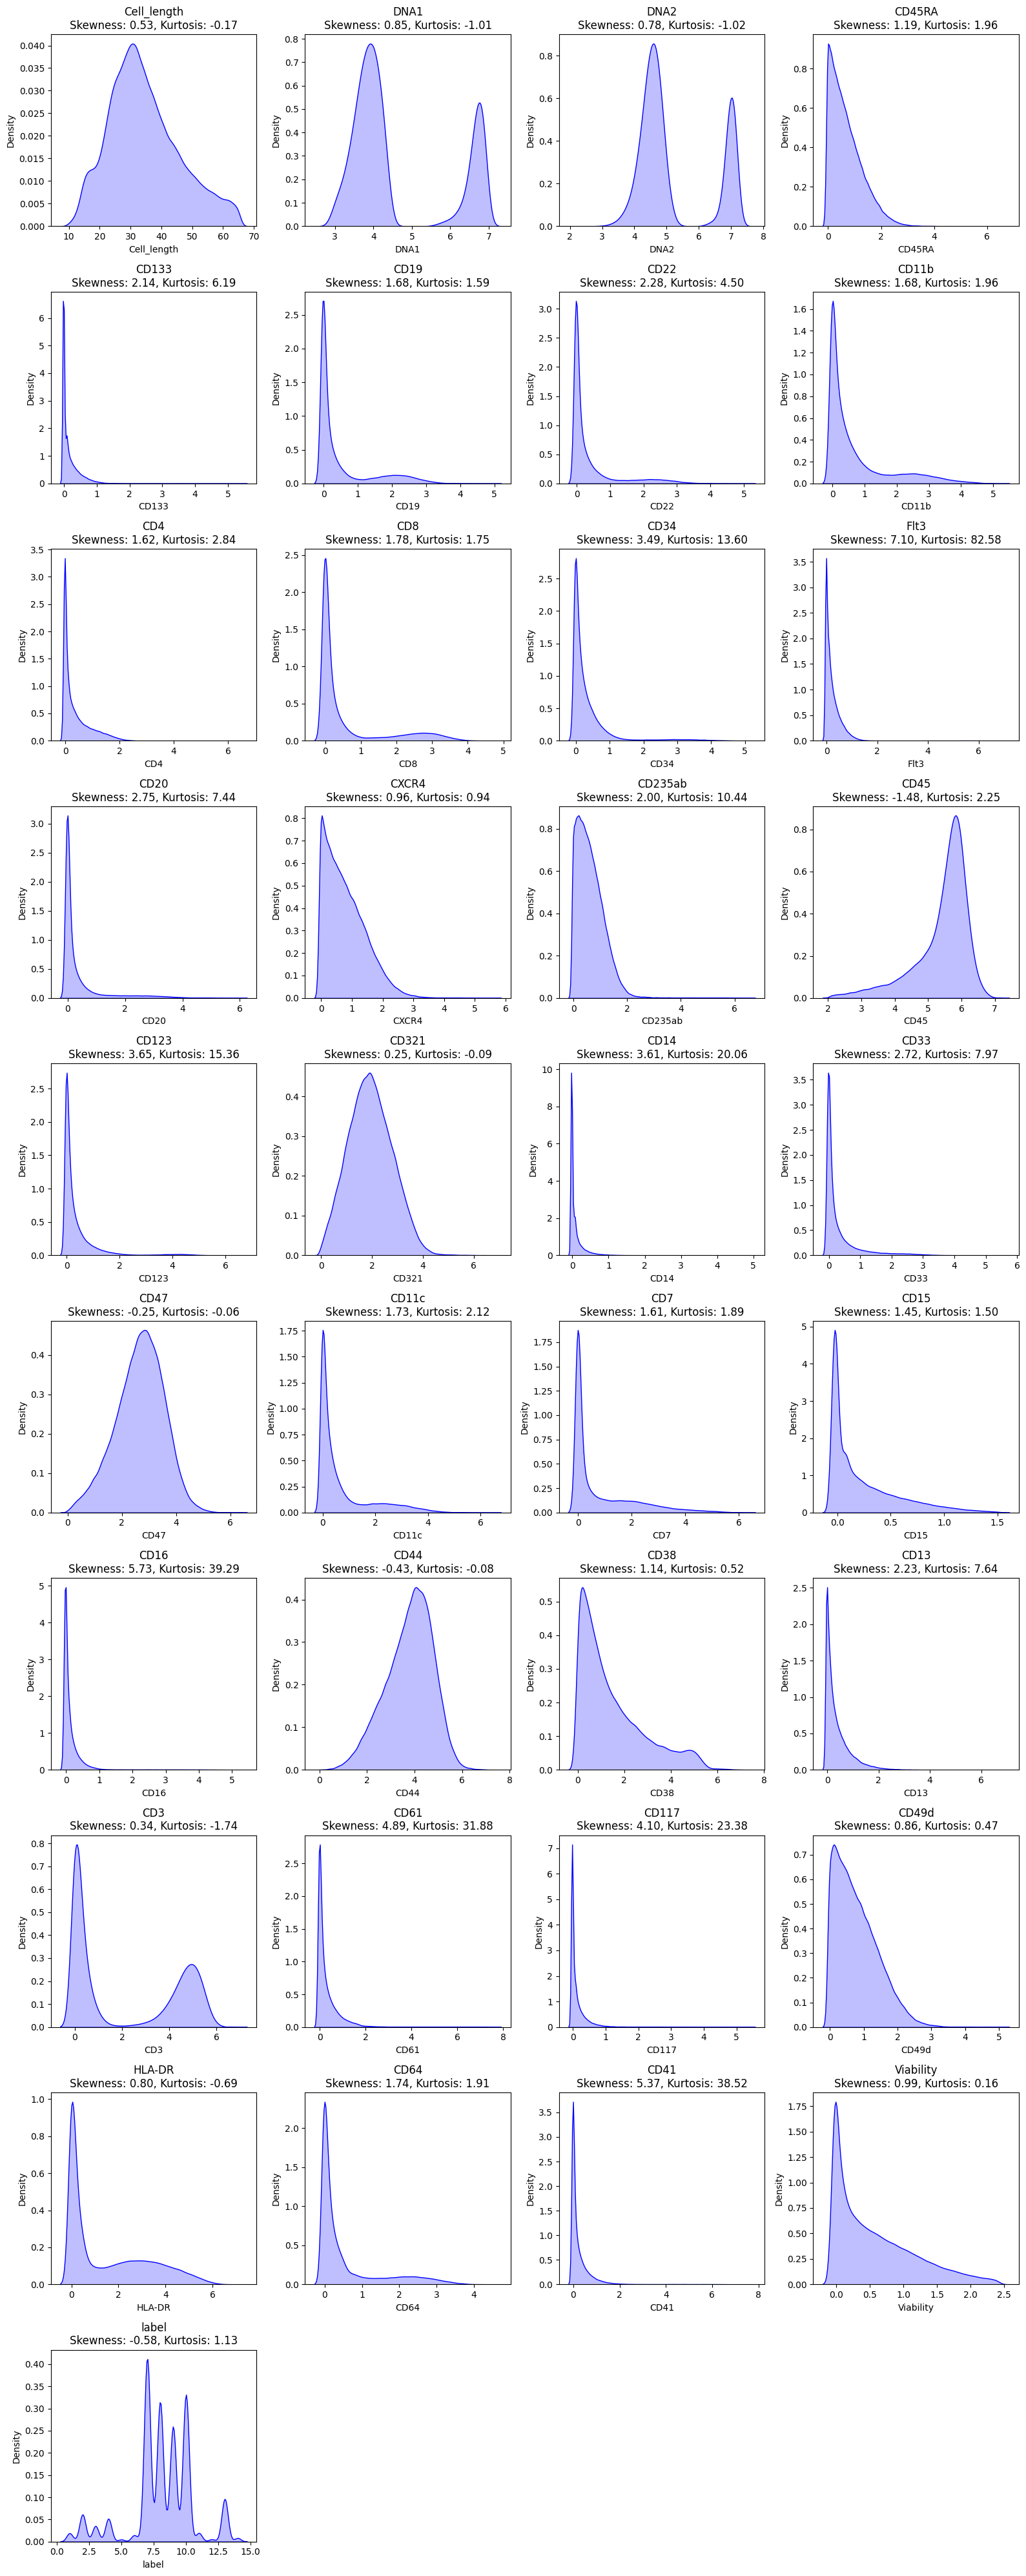

In [21]:


needed_cols = new_df.columns

num_cols = 4
num_rows = (len(needed_cols) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axs = axs.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(needed_cols):
    sns.kdeplot(new_df[col].dropna(), ax=axs[i], fill=True, color='blue')

    skewness_value = skew(new_df[col].dropna())
    kurtosis_value = kurtosis(new_df[col].dropna())

    axs[i].set_title(f'{col}\nSkewness: {skewness_value:.2f}, Kurtosis: {kurtosis_value:.2f}')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


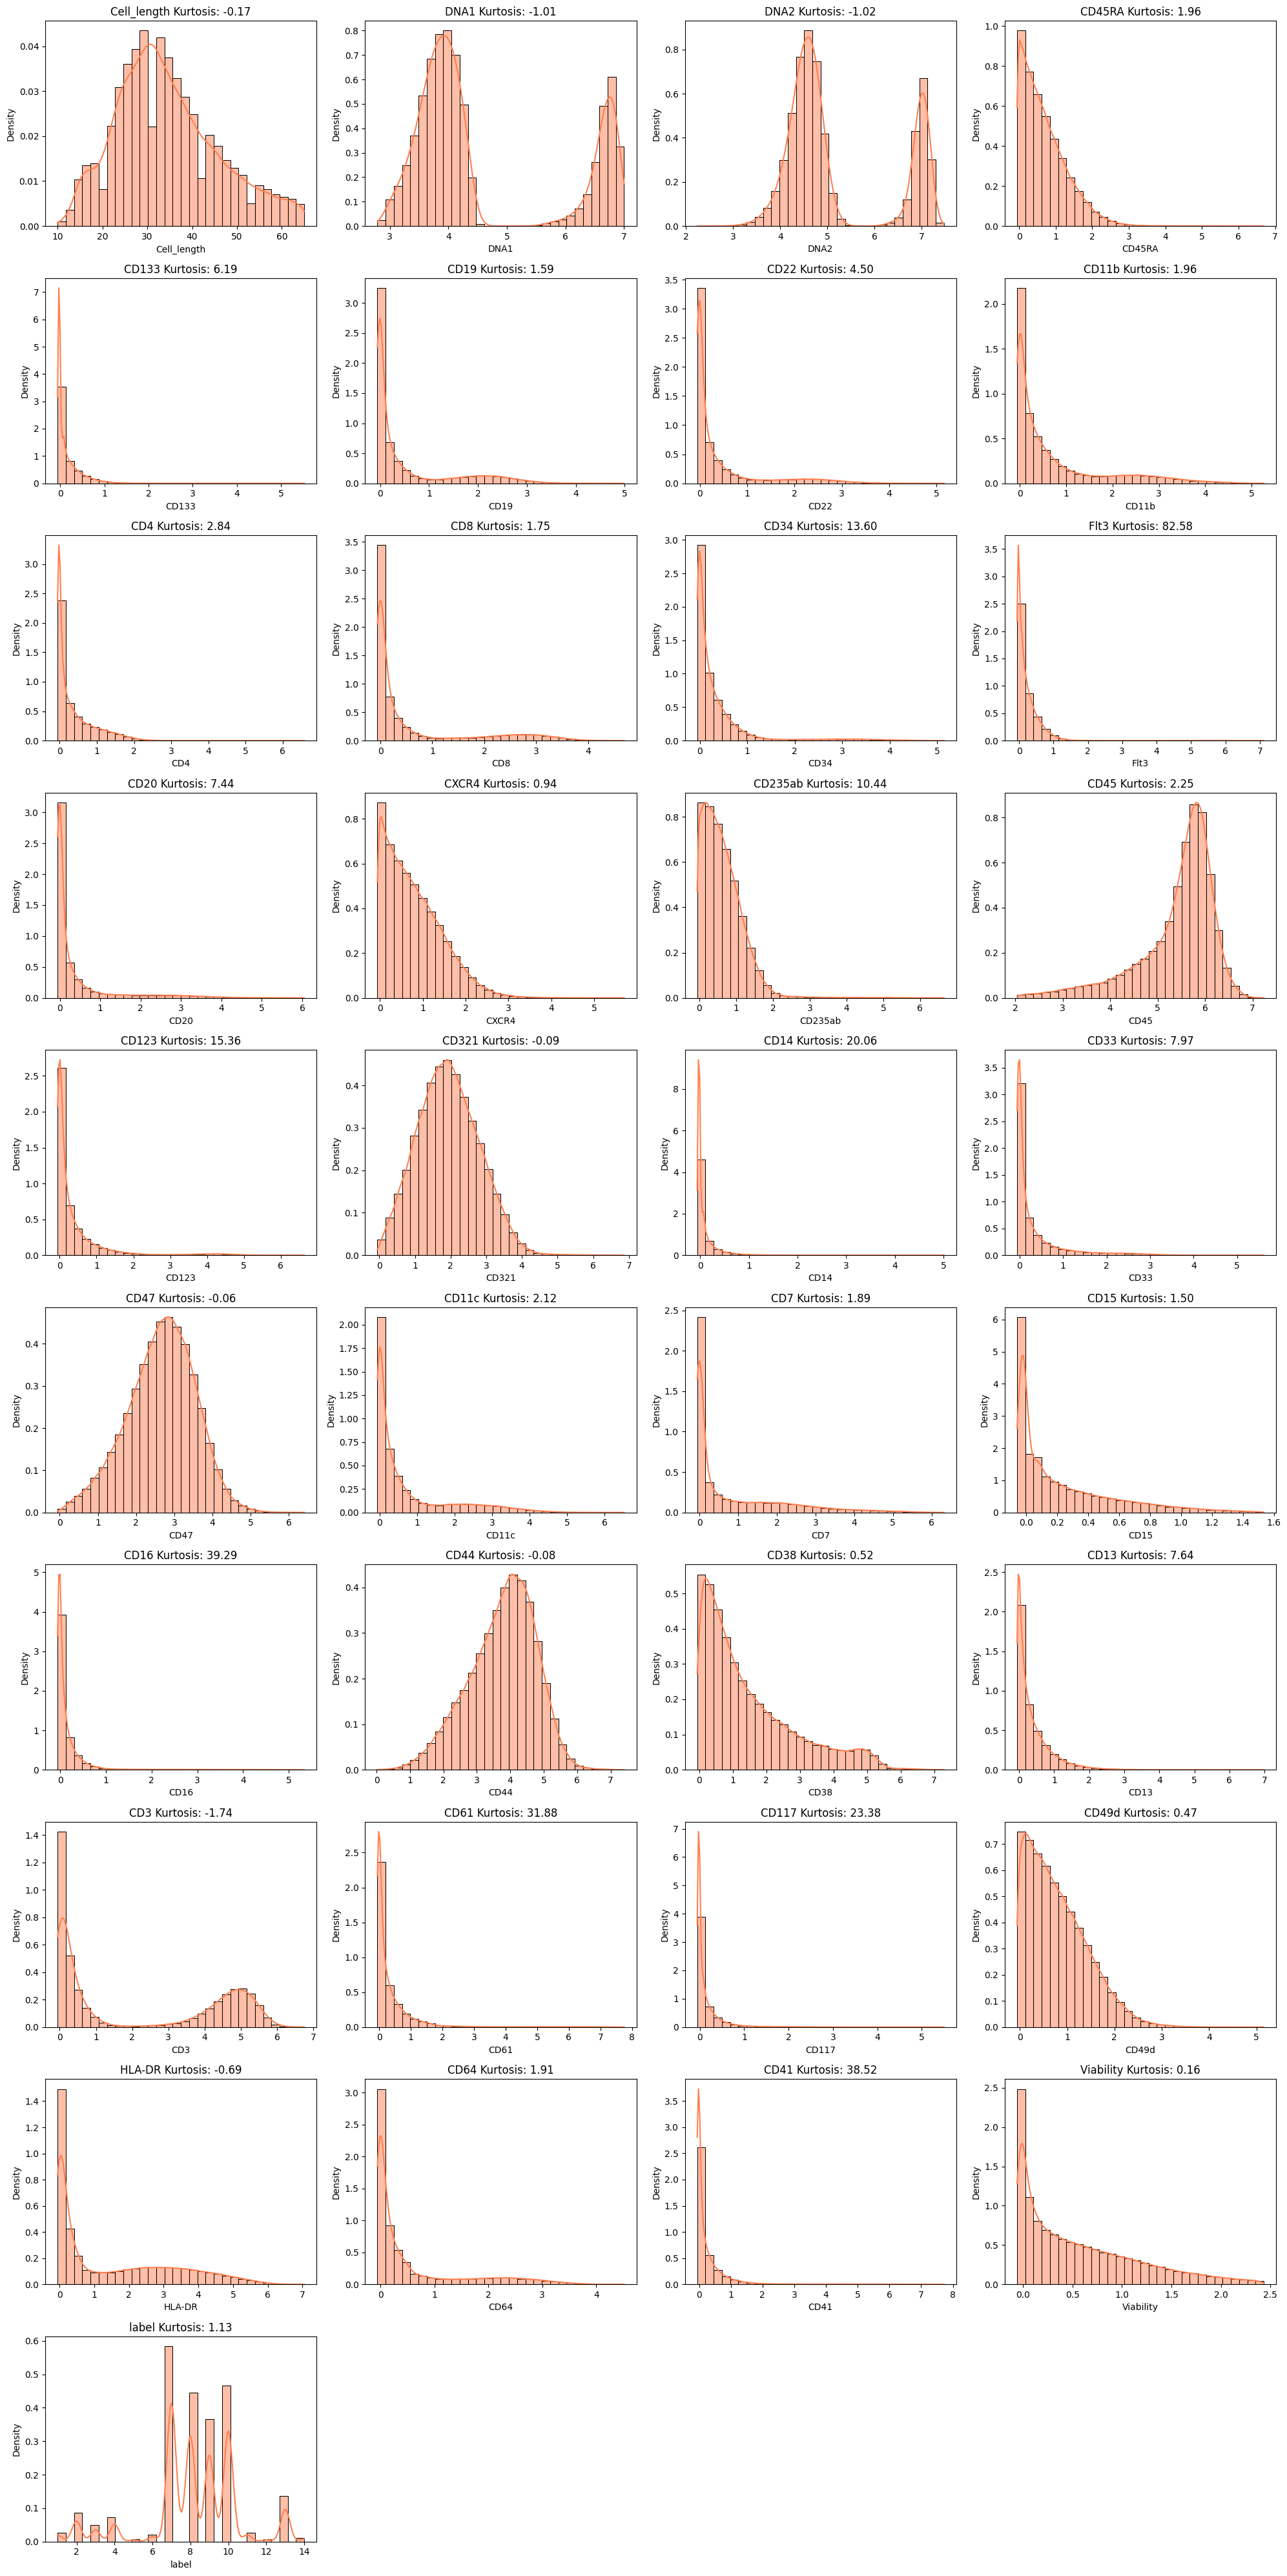

In [22]:

needed_cols = new_df.columns

num_cols = 4
num_rows = (len(needed_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

plot_color = 'coral'

for i, col in enumerate(needed_cols):
    sns.histplot(new_df[col], kde=True, ax=axes[i], bins=30, color=plot_color,stat='density')
    axes[i].set_title(f'{col} Kurtosis: {kurtosis(new_df[col].dropna()):.2f}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

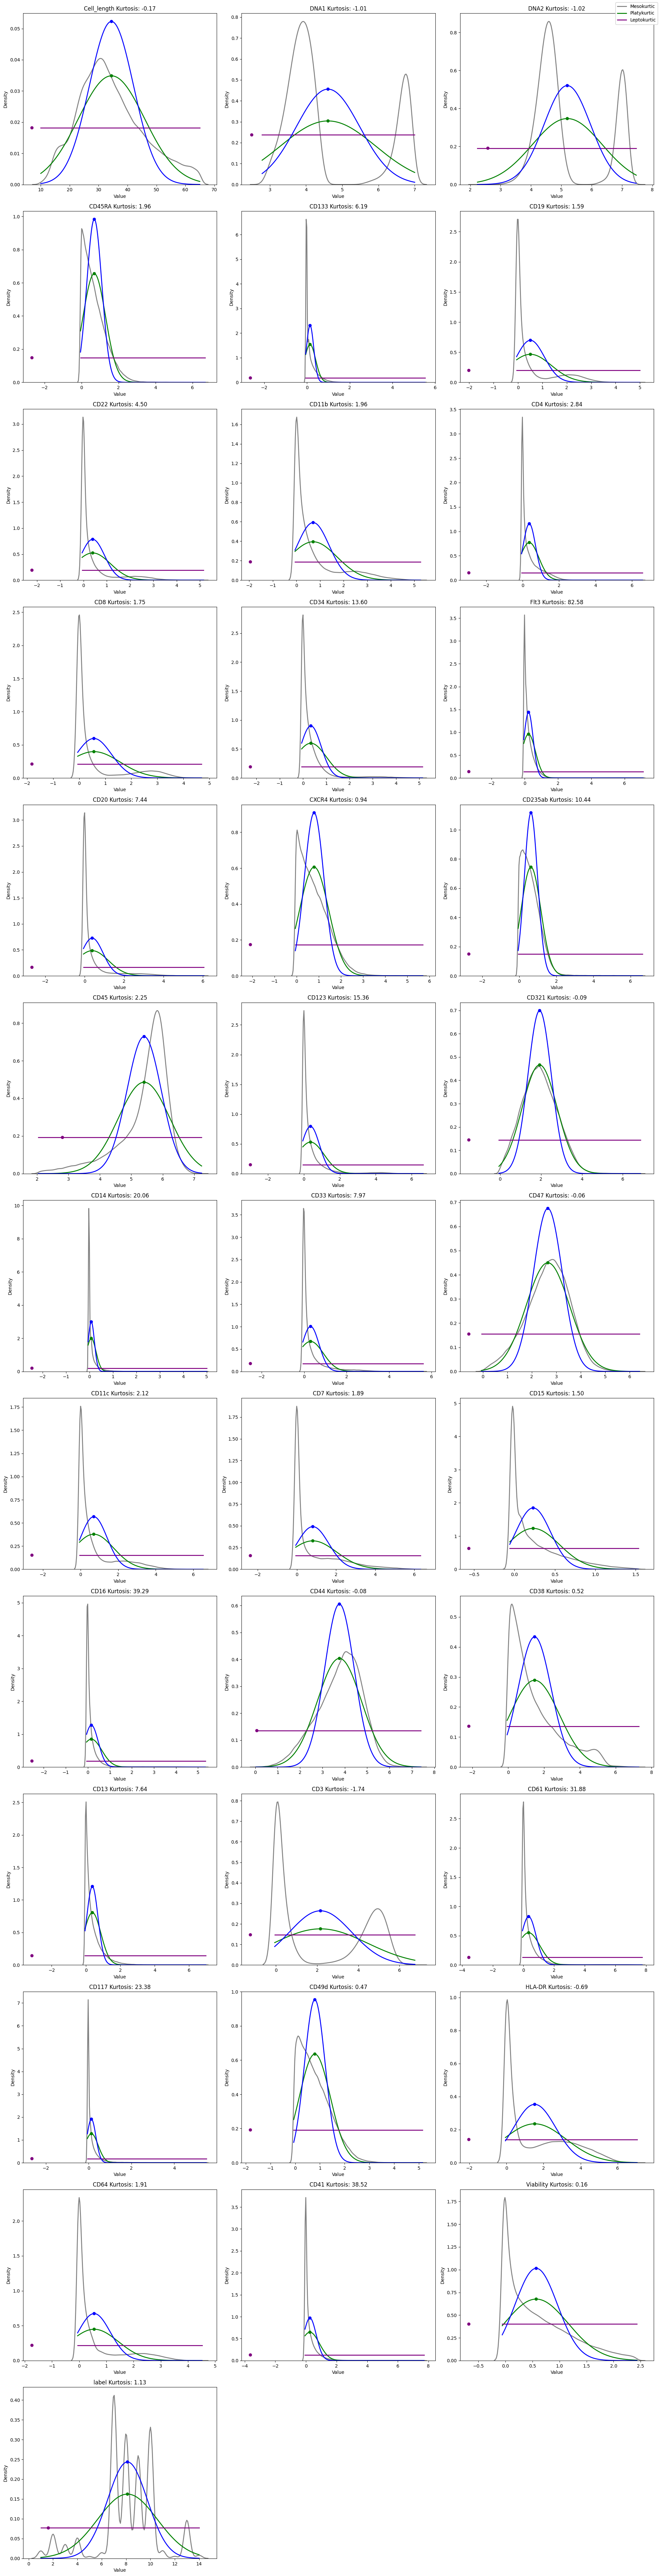

In [23]:
needed_cols = new_df.columns

num_cols = 3  # Number of columns in the subplot
num_rows = (len(needed_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, col in enumerate(needed_cols):
    data = new_df[col].dropna()

    x = np.linspace(min(data), max(data), 1000)
    meso_dist = norm.pdf(x, loc=np.mean(data), scale=np.std(data))

    # Generate Platykurtic and Leptokurtic distributions
    platy_dist = uniform.pdf(x, loc=min(data), scale=(max(data) - min(data)))
    lepto_dist = norm.pdf(x, loc=np.mean(data), scale=np.std(data) / 1.5)  # steeper peak

    sns.kdeplot(data, ax=axes[i], color='gray', label=f'{col} Data', linewidth=2)

    # Plot the different kurtosis distributions
    axes[i].plot(x, meso_dist, label="Mesokurtic", color="green", linewidth=2)
    axes[i].plot(x, platy_dist, label="Platykurtic", color="purple", linewidth=2)
    axes[i].plot(x, lepto_dist, label="Leptokurtic", color="blue", linewidth=2)

    axes[i].scatter([np.mean(data), np.mean(data) - (max(data) - min(data)) / 2, np.mean(data)],
                    [max(meso_dist), max(platy_dist), max(lepto_dist)],
                    color=['green', 'purple', 'blue'], zorder=5)

    # Set the title and labels
    kurt_value = kurtosis(data)
    axes[i].set_title(f'{col} Kurtosis: {kurt_value:.2f}', fontsize=12)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    fig.legend(['Mesokurtic', 'Platykurtic', 'Leptokurtic'], loc='upper right', fontsize=10)

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


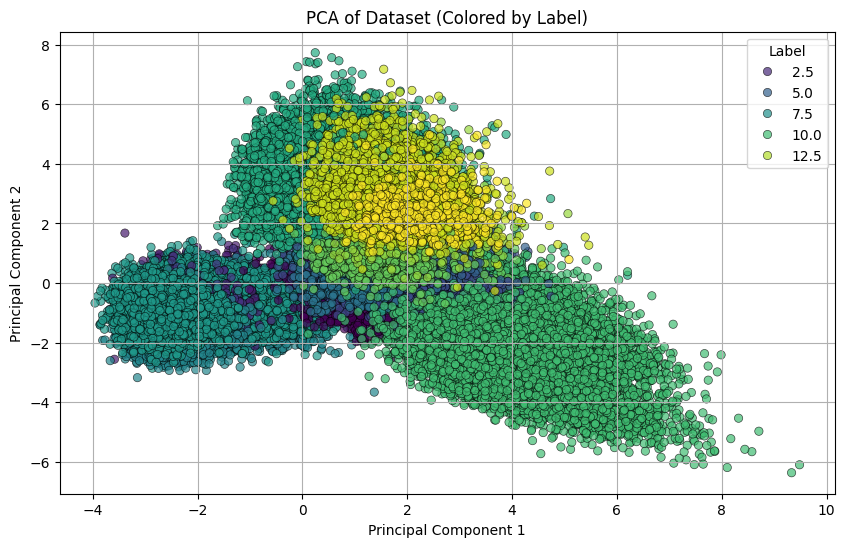

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop rows with missing labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_new_df[needed_cols])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results with labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = cleaned_new_df['label'].values

# Plot PCA results with colors for each label
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='label',  # Color points by label
    palette='viridis',  # Choose a color palette
    data=pca_df,
    edgecolor='k',
    alpha=0.7
)

# Add plot labels and title
plt.title('PCA of Dataset (Colored by Label)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Label', loc='upper right')
plt.show()


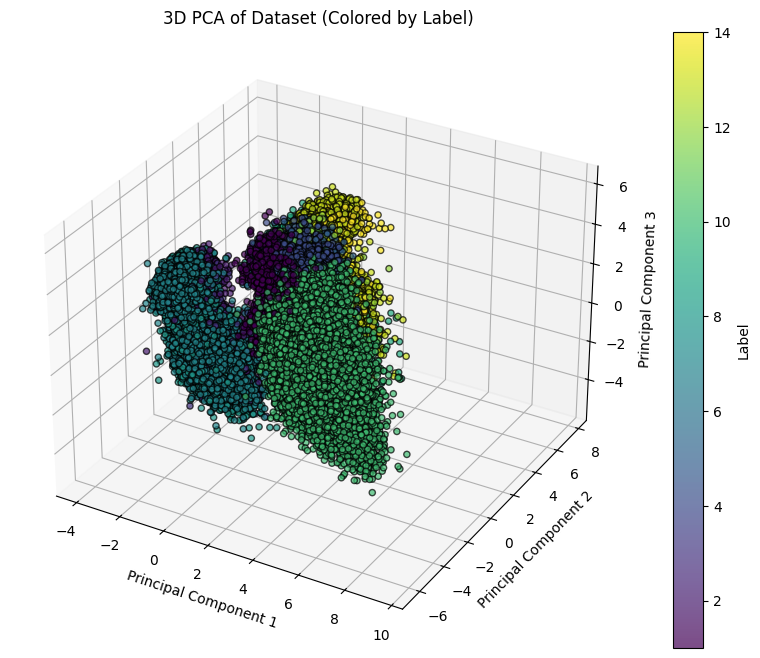

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Drop rows with missing labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_new_df[needed_cols])

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results with labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = cleaned_new_df['label'].values

# Plot PCA results in 3D with colors for each label
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['label'],  # Color points by label
    cmap='viridis',     # Choose a color palette
    edgecolor='k',
    alpha=0.7
)

# Set axis labels and plot title
ax.set_title('3D PCA of Dataset (Colored by Label)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show color bar and plot
plt.colorbar(scatter, ax=ax, label='Label')
plt.show()


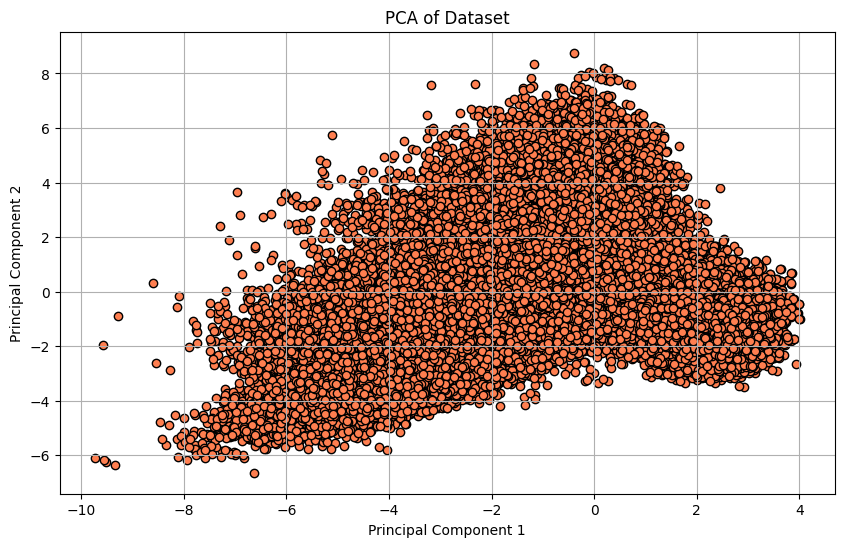

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

needed_cols = new_df.columns

# Fill missing values with the mean of each column
new_df_filled = new_df[needed_cols].fillna(new_df.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df_filled)

pca = PCA(n_components=2)  # Reducing to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Ploting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='coral', edgecolor='k')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



11490434/11490434 [==============================] - 0s 0us/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.756635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.076897
[t-SNE] KL divergence after 1000 iterations: 0.901051


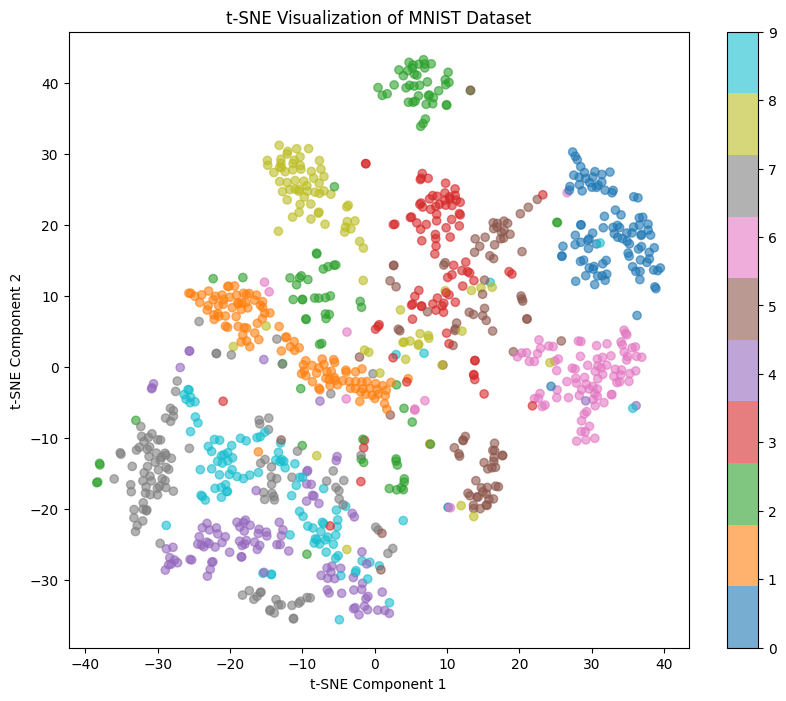

In [27]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.014s...
[t-SNE] Computed neighbors for 104184 samples in 2.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probabi

<ipython-input-29-3794f099bead>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
<ipython-input-29-3794f099bead>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]


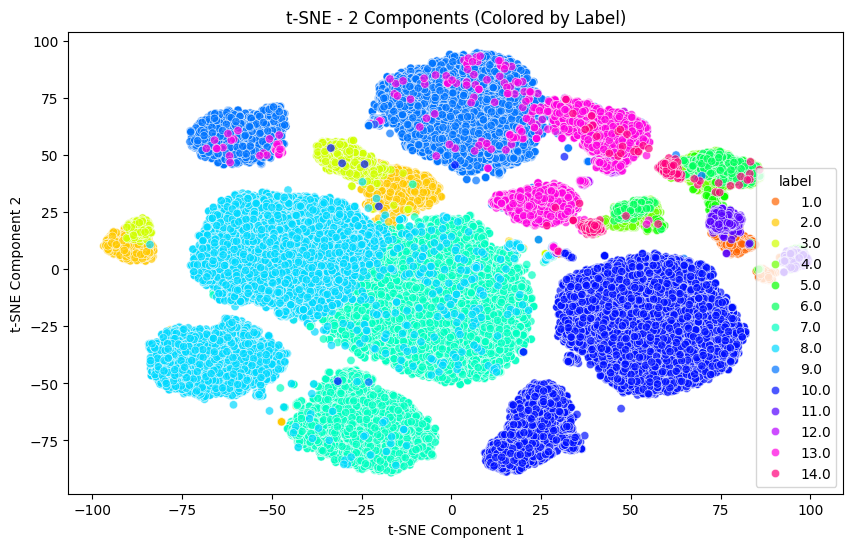

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'new_df' is your dataset, and the 'label' column contains class labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Select numerical features for t-SNE
numeric_columns = cleaned_new_df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_columns if col != 'label']

# Prepare the data
X = cleaned_new_df[features].values

# Handle missing values (if any are left)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]

# Plot the t-SNE results with different colors for each label
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne-2d-one',
    y='tsne-2d-two',
    hue='label',  # Use the 'label' column for color encoding
    palette=sns.color_palette("hsv", len(cleaned_new_df['label'].unique())),  # Color palette for labels
    data=cleaned_new_df,
    legend='full',
    alpha=0.7
)

plt.title('t-SNE - 2 Components (Colored by Label)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.015s...
[t-SNE] Computed neighbors for 104184 samples in 2.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probabi

<ipython-input-28-5653f18018b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
<ipython-input-28-5653f18018b6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]


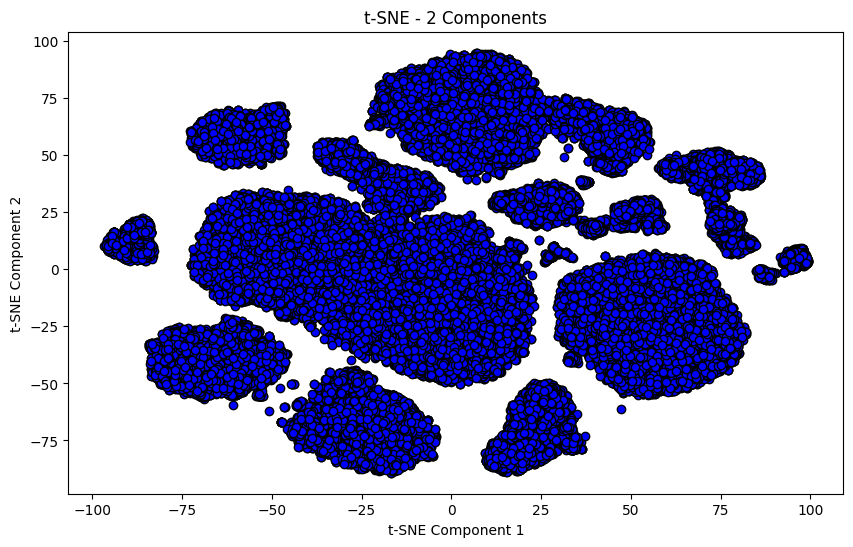

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

cleaned_new_df = new_df.dropna(subset=['label'])

numeric_columns = cleaned_new_df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_columns if col != 'label']

# Prepare the data
X = cleaned_new_df[features].values

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)

X_tsne = tsne.fit_transform(X_scaled)

cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_new_df['tsne-2d-one'], cleaned_new_df['tsne-2d-two'], c='blue', edgecolor='k')
plt.title('t-SNE - 2 Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.014s...
[t-SNE] Computed neighbors for 104184 samples in 2.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probabi

<ipython-input-30-aa456e98bd5d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-3d-one'] = X_tsne[:, 0]
<ipython-input-30-aa456e98bd5d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-3d-two'] = X_tsne[:, 1]
<ipython-input-30-aa456e98bd5d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

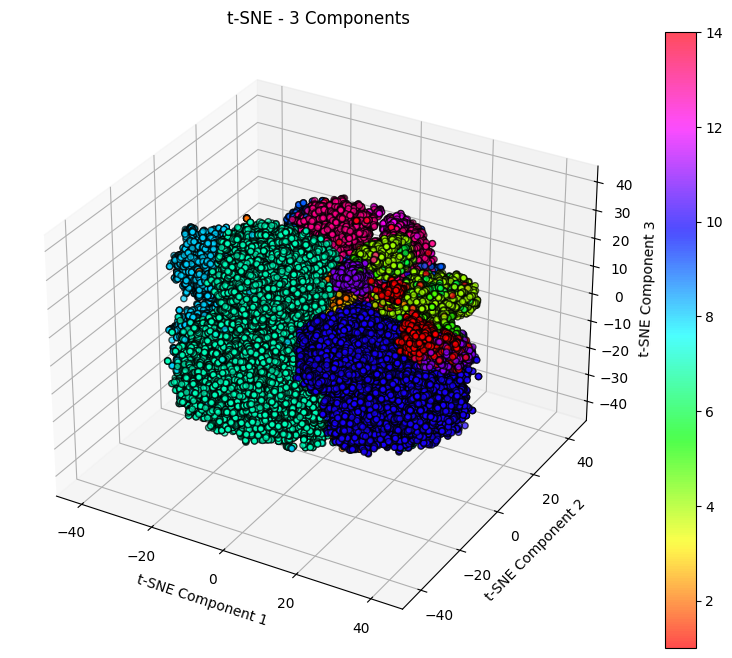

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming 'new_df' is your dataset, and the 'label' column contains class labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Select numerical features for t-SNE
numeric_columns = cleaned_new_df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_columns if col != 'label']

# Prepare the data
X = cleaned_new_df[features].values

# Handle missing values (if any are left)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000, verbose=1)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
cleaned_new_df['tsne-3d-one'] = X_tsne[:, 0]
cleaned_new_df['tsne-3d-two'] = X_tsne[:, 1]
cleaned_new_df['tsne-3d-three'] = X_tsne[:, 2]

# Plot the 3D t-SNE results with different colors for each label
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    cleaned_new_df['tsne-3d-one'],
    cleaned_new_df['tsne-3d-two'],
    cleaned_new_df['tsne-3d-three'],
    c=cleaned_new_df['label'],  # Color points based on 'label'
    cmap='hsv',  # Color map for the labels
    edgecolor='k',
    alpha=0.7
)

# Add axis labels and title
ax.set_title('t-SNE - 3 Components')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Show color bar
plt.colorbar(scatter)
plt.show()


In [31]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'X_scaled' is your standardized data
# Perform PCA
pca = PCA(n_components=4)  # Adjust n_components based on your need
pca.fit(X_scaled)

# Get explained variance (eigenvalues) and proportion of variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
std_dev = np.sqrt(explained_variance)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a pandas DataFrame for better formatting
pca_table = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

# Display the formatted table
pca_table = pca_table.style.format({
    'Standard Deviation': "{:.4f}",
    'Proportion of Variance': "{:.4f}",
    'Cumulative Proportion': "{:.4f}"
})

pca_table


In [32]:
import pandas as pd
import numpy as np

# Create a sample DataFrame called 'demodata' for demonstration
np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability
mask = np.random.binomial(1, p_m, data_array.shape)

# Apply the mask to the data array, setting masked elements to NaN
masked_data = np.where(mask, np.nan, data_array)

# Convert back to a DataFrame for easier analysis
masked_demodata = pd.DataFrame(masked_data, columns=demodata.columns)

print("Original DataFrame (demodata):\n", demodata)
print("\nMasked DataFrame (masked_demodata):\n", masked_demodata)


Original DataFrame (demodata):
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Masked DataFrame (masked_demodata):
    column1  column2  column3
0      5.0      NaN      NaN
1     12.0     20.0     25.0
2     18.0      NaN     35.0
3      NaN     30.0      NaN


In [33]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability, where 1 = not masked, 0 = masked
mask = np.random.binomial(1, 1 - p_m, data_array.shape)  # Reverse probability for desired 1/0 output

# Convert to a DataFrame for easier analysis
binary_mask_df = pd.DataFrame(mask, columns=demodata.columns)

print("Original DataFrame :\n", demodata)
print("\nBinary Mask DataFrame :\n", binary_mask_df)


Original DataFrame :
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Binary Mask DataFrame :
    column1  column2  column3
0        1        0        0
1        1        1        1
2        1        0        1
3        0        1        0


In [34]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with random digits
np.random.seed(42)
demodata = pd.DataFrame({
    'Feature1': np.random.randint(1,100,5),
    'Feature2': np.random.randint(1,100,5),
    'Feature3': np.random.randint(1,100,5)
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability
mask = np.random.binomial(1, p_m, data_array.shape)

# Apply the mask to the data array, setting masked elements to NaN
masked_data = np.where(mask, np.nan, data_array)

# Convert back to a DataFrame for easier analysis
masked_demodata = pd.DataFrame(masked_data, columns=demodata.columns)

print("Original DataFrame (demodata):\n", demodata)
print("\nMasked DataFrame (masked_demodata):\n", masked_demodata)


Original DataFrame (demodata):
    Feature1  Feature2  Feature3
0        52        21        88
1        93        83        24
2        15        87         3
3        72        75        22
4        61        75        53

Masked DataFrame (masked_demodata):
    Feature1  Feature2  Feature3
0       NaN       NaN      88.0
1      93.0      83.0      24.0
2      15.0      87.0       3.0
3      72.0      75.0      22.0
4      61.0      75.0       NaN


In [35]:
shuffled_demodata = demodata.apply(np.random.permutation)

print("Original DataFrame :\n", demodata)
print("\nShuffled DataFrame:\n", shuffled_demodata)

Original DataFrame :
    Feature1  Feature2  Feature3
0        52        21        88
1        93        83        24
2        15        87         3
3        72        75        22
4        61        75        53

Shuffled DataFrame:
    Feature1  Feature2  Feature3
0        52        83        22
1        93        75        24
2        61        75         3
3        72        87        88
4        15        21        53


In [36]:
# Shuffle each column to create x_shuffled
x_shuffled = demodata.apply(np.random.permutation)

# Define probability for binary mask m
p_m = 0.5
m = np.random.binomial(1, p_m, demodata.shape)  # Generate binary mask matrix

# Apply the formula
x = demodata.values  # Convert demodata DataFrame to NumPy array for element-wise operations
x_corrupted = x * (1 - m) + x_shuffled.values * m

# Convert the result back to a DataFrame for readability
x_corrupted_df = pd.DataFrame(x_corrupted, columns=demodata.columns)

# Print results
print("Original DataFrame (x):")
print(demodata)
print("\nShuffled DataFrame (x_shuffled):")
print(x_shuffled)
print("\nBinary Mask (m):")
print(pd.DataFrame(m, columns=demodata.columns))
print("\nCorrupted DataFrame (x_corrupted):")
print(x_corrupted_df)

Original DataFrame (x):
   Feature1  Feature2  Feature3
0        52        21        88
1        93        83        24
2        15        87         3
3        72        75        22
4        61        75        53

Shuffled DataFrame (x_shuffled):
   Feature1  Feature2  Feature3
0        61        87        88
1        15        75        53
2        93        75         3
3        52        21        22
4        72        83        24

Binary Mask (m):
   Feature1  Feature2  Feature3
0         0         0         0
1         1         0         1
2         0         1         1
3         0         1         1
4         1         1         1

Corrupted DataFrame (x_corrupted):
   Feature1  Feature2  Feature3
0        52        21        88
1        15        83        53
2        15        75         3
3        72        21        22
4        72        83        24


# Making the actual dataset corrupt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = df

# Exclude the specified columns

data_filtered = data.drop(columns=new_df)

# Set the probability of masking
p_m = 0.3

# Generate a binary mask matrix 'm'
m = np.random.binomial(1, 1 - p_m, data_filtered.shape)
binary_mask_df = pd.DataFrame(m, columns=data_filtered.columns)

# Shuffle each column in 'data_filtered' independently to create 'data_shuffled'
data_shuffled = data_filtered.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'data_corrupted' using the formula
data_corrupted_array = data_filtered.values * (1 - m) + data_shuffled.values * m
data_corrupted = pd.DataFrame(data_corrupted_array, columns=data_filtered.columns)

# Display results
print("Binary Mask DataFrame (m):\n", binary_mask_df)
print("\nShuffled DataFrame (data_shuffled):\n", data_shuffled)
print("\nCorrupted DataFrame (data_corrupted):\n", data_corrupted)


Binary Mask DataFrame (m):
         Event  Time  file_number  event_number  individual
0           1     1            1             0           0
1           1     1            1             1           1
2           1     0            0             1           1
3           0     1            1             1           1
4           1     1            1             1           1
...       ...   ...          ...           ...         ...
265622      1     1            1             1           1
265623      0     1            1             1           0
265624      0     0            1             1           1
265625      0     1            1             1           1
265626      1     0            1             1           1

[265627 rows x 5 columns]

Shuffled DataFrame (data_shuffled):
          Event       Time  file_number  event_number  individual
0       200894  212944.00     3.627711         81039           1
1        56897  206145.00     3.627711         70307           2
2   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = df

# Exclude the specified columns

# data_filtered = data.drop(columns=new_df)
data_filtered = df

# Set the probability of masking
p_m = 0.3

# Generate a binary mask matrix 'm' (changes every run)
m = np.random.binomial(1, 1 - p_m, data_filtered.shape)
binary_mask_df = pd.DataFrame(m, columns=data_filtered.columns)

# Shuffle each column in 'data_filtered' independently to create 'data_shuffled'
data_shuffled = data_filtered.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'data_corrupted' using the formula
data_corrupted_array = data_filtered.values * (1 - m) + data_shuffled.values * m
data_corrupted = pd.DataFrame(data_corrupted_array, columns=data_filtered.columns)

# Generate mask_new to indicate differences between original and corrupted data
mask_new = 1 * (data_filtered != data_corrupted)

# Print only the new mask matrix
print("New Mask Matrix (mask_new):\n", mask_new)


New Mask Matrix (mask_new):
         Event  Time  Cell_length  DNA1  DNA2  CD45RA  CD133  CD19  CD22  \
0           1     1            1     1     0       1      1     0     1   
1           0     1            1     0     0       0      0     1     0   
2           1     1            0     1     0       1      1     0     1   
3           0     0            1     1     1       1      1     1     1   
4           1     1            0     1     1       0      1     1     1   
...       ...   ...          ...   ...   ...     ...    ...   ...   ...   
265622      0     0            0     0     1       1      1     1     1   
265623      1     1            1     1     1       0      0     1     1   
265624      0     1            1     1     1       1      0     1     1   
265625      1     1            1     0     1       1      1     1     1   
265626      1     1            1     0     0       1      1     1     0   

        CD11b  ...  CD117  CD49d  HLA-DR  CD64  CD41  Viability  file_

In [ ]:
import numpy as np
import pandas as pd
# Define the target column used for labeling
label_column = 'label'
# Separate labeled and unlabeled data using label_df
label_df = df[df[label_column].notnull()] # labeled data
unlabeled_df = df[df[label_column].isnull()] # unlabeled data
# Split features and labels for labeled data
x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]
# Split features and labels for unlabeled data
x_unlabeled = unlabeled_df.drop(columns=[label_column])
y_unlabeled = unlabeled_df[label_column]
# Display results
print("Labeled Features (x_labeled):\n", x_labeled)
print("\nLabeled Labels (y_labeled):\n", y_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nUnlabeled Labels (y_unlabeled):\n", y_unlabeled)

Labeled Features (x_labeled):
          Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
104179  104180  641812.44           58  6.827981  7.249403 -0.000106   
104180  104181  653387.44           55  6.683204  7.166172  0.692668   
104181  104182  671024.44           40  6.911546  7.152603 -0.036795   
104182  104183  680006.44           48  6.700332  7.100771  0.308817   
104183  104184  687494.44           64  6.559460  7.080928  0.519572   

           CD133      CD19      CD22     CD11b  ...      CD61     CD117  \
0      -0.029585 -0.006696  0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the target column used for labeling
label_column = 'label'

# Assuming df is defined, separate labeled data
label_df = df[df[label_column].notnull()]

# Split features and labels for labeled data
x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]

# Split labeled data into training and testing sets (70%-30% split)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display results
print("Training Features (x_train):\n", x_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTraining Labels (y_train):\n", y_train)
print("\nTesting Labels (y_test):\n", y_test)


Training Features (x_train):
          Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
64113    64114  401196.00           25  3.899656  4.594272  0.976652   
82744    82745  502826.44           31  6.592998  6.901888  0.431481   
24294    24295  488377.00           41  3.543583  4.467671  0.377192   
7820      7821  225689.00           38  4.305227  4.881685  0.199351   
43295    43296  153333.00           26  4.159271  4.861015  0.831285   
...        ...        ...          ...       ...       ...       ...   
54886    54887   93991.00           15  4.074604  4.747052  0.431805   
76820    76821   46189.00           33  6.584427  6.882117  0.640424   
103694  103695  574005.44           43  6.719895  7.080995  0.306443   
860        861  516979.00           26  3.886782  4.886936  0.060176   
15795    15796  225860.00           25  3.523293  4.289820  0.646288   

           CD133      CD19      CD22     CD11b  ...      CD61     CD117  \
64113   0.302811  0.154761 -0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Load the Levine_32 dataset
df_levine = df

# Apply the corrupt_data function to the Levine_32 dataset
df_levine_corrupted = corrupt_data(df_levine, corruption_prob=0.3)

# Generate the mask matrix
mask_levine = 1 * (df_levine != df_levine_corrupted)

# Get the indices of labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices_levine = mask_levine.any(axis=1)
unlabeled_indices_levine = ~labeled_indices_levine

# Create the labeled and unlabeled datasets for Levine_32
x_labeled_levine = df_levine[labeled_indices_levine]
y_labeled_levine = mask_levine[labeled_indices_levine]
x_unlabeled_levine = df_levine[unlabeled_indices_levine]
y_unlabeled_levine = mask_levine[unlabeled_indices_levine]

# Split labeled data into train and test sets (70/30 ratio)
x_train_levine, x_test_levine, y_train_levine, y_test_levine = train_test_split(
    x_labeled_levine, y_labeled_levine, test_size=0.3, random_state=42
)

# Print the shapes of the datasets to verify
print("Shape of x_train_levine:", x_train_levine.shape)
print("Shape of y_train_levine:", y_train_levine.shape)
print("Shape of x_test_levine:", x_test_levine.shape)
print("Shape of y_test_levine:", y_test_levine.shape)

Shape of x_train_levine: (185938, 42)
Shape of y_train_levine: (185938, 42)
Shape of x_test_levine: (79689, 42)
Shape of y_test_levine: (79689, 42)


In [ ]:
import pandas as pd
import numpy as np

label_column = 'label'

# Check if the label column exists
if label_column in new_df.columns:
    # Split the data based on the presence of labels
    labeled_data = new_df.dropna(subset=[label_column])
    unlabeled_data = new_df[new_df[label_column].isna()]

    # Optional: Drop the label column from the unlabeled data (as they are not needed)
    unlabeled_data = unlabeled_data.drop(columns=[label_column])

    print("Labeled Data:")
    print(labeled_data.head())
    print("\nUnlabeled Data:")
    print(unlabeled_data.head())
else:
    print(f"Label column '{label_column}' not found in the dataset.")


Labeled Data:
   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0           22  4.391057  4.617262  0.162691 -0.029585 -0.006696  0.066388   
1           35  4.340481  4.816692  0.701349 -0.038280 -0.016654  0.074409   
2           32  3.838727  4.386369  0.603568 -0.032216  0.073855 -0.042977   
3           29  4.255806  4.830048  0.433747 -0.027611 -0.017661 -0.044072   
4           25  3.976909  4.506433 -0.008809 -0.030297  0.080423  0.495791   

      CD11b       CD4       CD8  ...      CD13       CD3      CD61     CD117  \
0 -0.009184  0.363602  0.520195  ...  0.038552 -0.032596 -0.002936  0.053050   
1  0.808031 -0.035424 -0.010551  ...  1.457326 -0.043466  1.258437  0.089660   
2 -0.001881 -0.008781 -0.005632  ...  0.213583  0.320792  0.257137  0.046222   
3  0.733698 -0.019066  0.056109  ...  0.514349  0.060443 -0.041140  0.066470   
4  1.107627  0.552746  0.031310  ...  0.585712  0.137186  0.168609 -0.006223   

      CD49d    HLA-DR      CD64     

In [ ]:
from sklearn.model_selection import train_test_split

label_column = 'label'

# Separate features (X) and labels (y) from the labeled data
x = labeled_data.drop(columns=[label_column])
y = labeled_data[label_column]

# Split the labeled data into 70% training and 30% test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training features (X_train):")
print(x_train.head())
print("\nTest features (X_test):")
print(x_test.head())
print("\nTraining labels (y_train):")
print(y_train.head())
print("\nTest labels (y_test):")
print(y_test.head())
print("\nShape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("shape of X", x.shape)
print("shape of y", y.shape)


Training features (X_train):
       Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
64113           25  3.899656  4.594272  0.976652  0.302811  0.154761   
82744           31  6.592998  6.901888  0.431481 -0.052898 -0.037690   
24294           41  3.543583  4.467671  0.377192  0.219081  0.245478   
7820            38  4.305227  4.881685  0.199351  0.100678 -0.025812   
43295           26  4.159271  4.861015  0.831285  0.191518  2.002712   

           CD22     CD11b       CD4       CD8  ...      CD38      CD13  \
64113 -0.011676  3.180236  1.465950  0.086209  ...  1.563844  0.480488   
82744 -0.029715 -0.040846  0.914311  0.022305  ...  1.232765  0.100678   
24294  0.193328  0.075123  0.936352 -0.044813  ...  0.486930  0.046766   
7820  -0.002898  1.437247 -0.013400 -0.001012  ...  1.250272  0.731957   
43295  3.387782  0.179219  0.115231 -0.010963  ...  2.883403  0.345273   

            CD3      CD61     CD117     CD49d    HLA-DR      CD64      CD41  \
64113  0.01701

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset

# Define the target column used for labeling
label_column = 'label'

# Separate labeled data
label_df = df[df[label_column].notnull()]

# Split features and labels for labeled data
x_labeled = label_df.drop(columns=[label_column])
y_labeled = label_df[label_column]

# Encode labels if necessary (e.g., for non-numeric labels)
label_encoder = LabelEncoder()
y_labeled = label_encoder.fit_transform(y_labeled)

# Split labeled data into training and testing sets (70%-30% split)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Scale features for Logistic Regression and XGBoost
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression Model with increased max_iter and scaled data
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train_scaled, y_train)
y_test_hat_logistic = logistic_model.predict_proba(x_test_scaled)

# XGBoost Model (using scaled data)
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(x_train_scaled, y_train)  # Use scaled data for training
y_test_hat_xgb = xgb_model.predict_proba(x_test_scaled)  # Use scaled test data

# Display the predicted probabilities for Logistic Regression and XGBoost
print("Logistic Regression Predicted Probabilities:\n", y_test_hat_logistic)
print("\nXGBoost Predicted Probabilities:\n", y_test_hat_xgb)


Logistic Regression Predicted Probabilities:
 [[8.71532014e-11 7.15777512e-16 5.86413813e-12 ... 3.71679134e-10
  2.57615664e-08 2.92952487e-08]
 [3.89684389e-14 5.45734530e-13 1.08967360e-13 ... 9.25120234e-10
  3.73081989e-05 6.16167181e-09]
 [1.84225273e-11 5.90550517e-10 1.12355888e-11 ... 1.59113271e-11
  1.62867176e-05 6.66716711e-10]
 ...
 [5.05774251e-10 1.66206209e-05 5.93223532e-09 ... 3.54583853e-09
  3.57005965e-11 9.95221511e-09]
 [6.94828818e-11 7.05048242e-10 2.51660858e-10 ... 1.19779551e-11
  1.34185138e-06 2.54193721e-06]
 [3.32647156e-10 1.39746319e-06 5.84840147e-10 ... 1.09125624e-13
  1.93385444e-05 1.73712999e-10]]

XGBoost Predicted Probabilities:
 [[8.8804103e-07 8.2875789e-07 5.7034327e-07 ... 1.1134865e-06
  7.0003387e-07 9.7590839e-07]
 [7.1397778e-07 7.8185877e-07 5.3256036e-07 ... 1.1057809e-06
  6.3680345e-06 1.2659862e-06]
 [8.2513844e-07 9.2658485e-07 6.4014063e-07 ... 9.4035636e-07
  2.3140719e-06 1.1265030e-06]
 ...
 [4.7537603e-07 1.6399291e-06 4.652

In [ ]:
from sklearn.metrics import log_loss
# Calculate log loss for Logistic Regression
logistic_loss = log_loss(y_test, y_test_hat_logistic)
print("Logistic Regression Log Loss:", logistic_loss)

# Calculate log loss for XGBoost
xgb_loss = log_loss(y_test, y_test_hat_xgb)
print("XGBoost Log Loss:", xgb_loss)




Logistic Regression Log Loss: 0.007401566935815308
XGBoost Log Loss: 0.0014473331046161019


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define binary mask generation function
def binary_mask(p_m, x):
    """
    Generate a binary mask with the same shape as x, where each element is set to 0 with probability p_m.
    """
    return np.random.binomial(1, 1 - p_m, x.shape)

# Define corruption function
def corruption(mask, x):
    """
    Apply the mask to x, setting masked elements to 0 to simulate corrupted input.
    """
    return x * mask

# Define the self-supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size and epochs from parameters
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    learning_rate = parameters['learning_rate']
    hidden_units = parameters['hidden']
    _, dimension = x_unlabeled.shape

    # Input layer
    input_layer = Input(shape=(dimension,))

    # Encoder layer
    h = Dense(hidden_units, activation='relu')(input_layer)  # Use hidden_units for the number of neurons

    # Output 1 --> mask estimation
    output1 = Dense(dimension, activation='sigmoid', name='mask_estimation')(h)

    # Output 2 --> feature estimation
    output2 = Dense(dimension, activation='sigmoid', name='feature_estimation')(h)

    # Model definition
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with custom loss weights as floats
    model.compile(
        optimizer="rmsprop",  # Using the optimizer defined by the user
        loss={'mask_estimation': "binary_crossentropy", 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}
    )

    # Generate corruption binary mask
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)

    # Corrupt the unlabeled data
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)

    # Training the model with corrupted data
    history = model.fit(
        x_unlabeled_corrupted,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model, history



# Scale the data using StandardScaler
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.3  # Masking probability
alpha = 2.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50,              # Number of epochs for training
    'learning_rate': 0.001,    # Learning rate for the optimizer
    'hidden': 64               # Number of neurons in the hidden layer
}

# Run self-supervised training
encoder, model, history = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

# Print the model summary
model.summary()

# Optionally, you can also print the training history
print("Training history:", history.history)


Epoch 1/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - feature_estimation_loss: 0.6253 - loss: 2.1868 - mask_estimation_loss: 1.5615
Epoch 2/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.5765 - loss: 1.8092 - mask_estimation_loss: 1.2327
Epoch 3/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.5313 - loss: 1.7572 - mask_estimation_loss: 1.2258
Epoch 4/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: 0.4912 - loss: 1.7092 - mask_estimation_loss: 1.2180
Epoch 5/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - feature_estimation_loss: 0.4566 - loss: 1.6729 - mask_estimation_loss: 1.2163
Epoch 6/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.4257 - loss: 1.6415 - mask_estimation_loss: 1.2159
Epoch 7/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - feature_estimation_loss: 0.3972 - loss: 1.6091 - mask_estimation_loss: 1.2119
Epoch 8/50
1262/1262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - featu

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 41)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          2,688 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 41)             │          2,665 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 41)             │          2,665 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,038 (62.65 KB)

 Trainable params: 8,018 (31.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,020 (31.33 KB)

Training history: {'feature_estimation_loss': [0.6076679825782776, 0.5656252503395081, 0.5208562016487122, 0.48247605562210083, 0.4488697648048401, 0.4181036949157715, 0.39166226983070374, 0.37239915132522583, 0.3573102653026581, 0.34325265884399414, 0.3295419216156006, 0.3173496723175049, 0.3075021207332611, 0.30094823241233826, 0.2959044575691223, 0.29149097204208374, 0.2872261106967926, 0.28291431069374084, 0.27877524495124817, 0.2753047049045563, 0.2722378373146057, 0.26921844482421875, 0.26600781083106995, 0.2625766098499298, 0.258847713470459, 0.255855530500412, 0.253881573677063, 0.2521369457244873, 0.2504371106624603, 0.24880577623844147, 0.24712912738323212, 0.24548417329788208, 0.24389426410198212, 0.24243132770061493, 0.24107065796852112, 0.23969772458076477, 0.2383573204278946, 0.2370160073041916, 0.23582656681537628, 0.23472696542739868, 0.23382563889026642, 0.2328900843858719, 0.2321152240037918, 0.23126667737960815, 0.2305789291858673, 0.2298528403043747, 0.2291452288627

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m."""
    return np.random.binomial(1, p_m, data.shape)

def corruption(mask, data):
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])

    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

    data_corrupted = data * (1 - mask) + shuffled_data * mask
    mask_new = (data != data_corrupted).astype(int)

    return mask_new, data_corrupted

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Define model architecture
    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension), activation='relu')(input_layer)

    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile model with appropriate loss functions and weights
    model.compile(
        optimizer="rmsprop",
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}  # Corrected to use float
    )

    # Generate corrupted input and mask labels
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)
    x_unlabeled_corrupted,mask_label = corruption(corruption_binary_mask, x_unlabeled)

    assert x_unlabeled_corrupted.shape == mask_label.shape


    # Train model
    model.fit(x_unlabeled_corrupted, {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size)

    # Display model summary (this will print the model's parameters)
    model.summary()

    # Define encoder
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder


    import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = df

# Exclude specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data_filtered)  # Now x_unlabeled_scaled is defined

# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder_model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - feature_estimation_loss: 0.0752 - loss: 2.1205 - mask_estimation_loss: 2.0453
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - feature_estimation_loss: -0.0036 - loss: 1.9971 - mask_estimation_loss: 2.0008
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -0.0213 - loss: 1.9750 - mask_estimation_loss: 1.9962
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.0135 - loss: 1.9870 - mask_estimation_loss: 2.0005
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - feature_estimation_loss: -0.0282 - loss: 1.9725 - mask_estimation_loss: 2.0006
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -0.0275 - loss: 1.9705 - mask_estimation_loss: 1.9980
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.0643 - loss: 1.9354 - mask_estimation_loss: 1.9997
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - 

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 35)             │          1,260 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 35)             │          1,260 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 35)             │          1,260 │ dense_1[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,562 (29.54 KB)

 Trainable params: 3,780 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,782 (14.78 KB)

In [ ]:
encoder_path = "/content/encoder_model.keras"
encoder_model.save(encoder_path)

In [ ]:
from keras.models import load_model
encoder_model = load_model(encoder_path)

In [ ]:
# Select only the first 35 features if encoder_model expects 35 features
x_train_scaled = x_train_scaled[:, :35]
x_test_scaled = x_test_scaled[:, :35]

# Step 1: Encode the training and testing data using the encoder model
x_train_scaled_encoded = encoder_model.predict(x_train_scaled)
x_test_scaled_encoded = encoder_model.predict(x_test_scaled)

# Step 1: Encode the training and testing data using the encoder model
x_train_scaled_encoded = encoder_model.predict(x_train_scaled)
x_test_scaled_encoded = encoder_model.predict(x_test_scaled)

# Step 2: Train and evaluate Logistic Regression on the encoded data
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train_scaled_encoded, y_train)
y_encoded_logistic = logistic_model.predict_proba(x_test_scaled_encoded)

# Step 3: Compute and print log loss for Logistic Regression
print("Logistic Regression Log Loss:", log_loss(y_test, y_encoded_logistic))

# Step 4: Train and evaluate XGBoost on the encoded data
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(x_train_scaled_encoded, y_train)
y_encoded_xgb = xgb_model.predict_proba(x_test_scaled_encoded)

# Step 5: Compute and print log loss for XGBoost
print("XGBoost Log Loss:", log_loss(y_test, y_encoded_xgb))


2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Log Loss: 0.6282478356296017
XGBoost Log Loss: 0.6661222377685634


# overview of functions


In [ ]:
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):


def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):


def semi_supervised(x_train,y_train , x_unlabaled, x_test, parameters, mask_probability, K , beta):


# Function for the model, train, semi_supervised

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the model function
def build_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    model = models.Model(inputs=inputs, outputs=[y_logit, y], name="model")
    return model

# Define the training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_logit, y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)

        unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        total_loss = y_loss + beta * unlabeled_y_loss
        grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Define the semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    hidden_dimension = parameters['hidden_dimension']
    batch_size = parameters['batch_size']
    epochs = parameters['epochs']
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map class labels if y_train is categorical
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
        y_train = np.vectorize(class_mapping.get)(y_train)

    # Split training data into training and validation sets
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]

    splitted_train_x = x_train[train_index, :]
    splitted_train_y = y_train[train_index]
    splitted_valid_x = x_train[valid_index, :]
    splitted_valid_y = y_train[valid_index]

    # Data encoding
    encoder_model_path = "/content/encoder_model.keras"
    encoder = tf.keras.models.load_model(encoder_model_path)

    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised learning model
    supervised_model = build_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension
    )
    optimizer = optimizers.Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    for epoch in range(epochs):
        batch_index = np.random.choice(len(splitted_train_x), batch_size, replace=False)
        batch_x = splitted_train_x[batch_index]
        batch_y = splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask_batch_unlabeled = binary_mask(mask_probability, batch_unlabeled_x)
            _, unlabeled_shuffled_temp = corruption(mask_batch_unlabeled, batch_unlabeled_x)
            unlabeled_shuffled_temp_encoded = encoder.predict(unlabeled_shuffled_temp)
            batch_unlabeled_x_shuffled.append(unlabeled_shuffled_temp_encoded)

        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        y_valid_logit, y_valid = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}")

    y_test_logit, y_test = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1. Define features and labels
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual'] # Replace 'target_label' with your label column name
features = [col for col in new_df.columns if col not in exclude_columns]  # Exclude specific columns

X = new_df[features].values  # Features (exclude the label column)
y = new_df['label'].values  # Labels (use the excluded column for labels)

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
new_df_scaled_train = scaler.fit_transform(X_train)  # Scaled training features
new_df_scaled_test = scaler.transform(X_test)        # Scaled test features

# 4. Handle unlabeled data
X_unlabeled = X_train.copy()  # Using training data as a proxy for unlabeled data
x_unlabeled_scaled = scaler.transform(X_unlabeled)

# 5. Encode the labels (if needed)
encoder = OneHotEncoder(sparse_output=False)  # Use 'sparse_output' instead of 'sparse'
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

new_df_labels_train = y_train_encoded
new_df_labels_test = y_test_encoded

# 6. Call the semi_supervised function
parameters = {
    'hidden_dimension': 100,
    'batch_size': 128,
    'epochs': 1000
}
mask_probability = 0.3
alpha = 2.0
K = 3
beta = 1.0

y_test, supervised_model = semi_supervised(
    x_train=new_df_scaled_train,
    y_train=new_df_labels_train,
    x_unlabeled=x_unlabeled_scaled,
    x_test=new_df_scaled_test,
    parameters=parameters,
    mask_probability=mask_probability,
    K=K,
    beta=beta
)


665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 0/1000, Validation Loss: 6.1406
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    # inputs -> takes input dimension as argument
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs) # dense layer 1
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x) # dense layer 2
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x) # logit output
    y = layers.Activation('softmax', name='model_output')(y_logit) # actual prediction
    model = models.Model(inputs=inputs, outputs=[y_logit, y], name="model") # model creation
    return model


In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_logit, y = model(feature_batch, training=True) # getting outputs for labeled data
        y_loss = supv_loss_fn(label_batch, y) # calculating supervised loss function for labeled data
        unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training=True) # getting outputs for unlabeled data
        unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1]) # loss function for unlabeled data
        # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to reduce the variance of the output
        total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
        grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradients or by how much the weights need to be changed
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

    return total_loss


In [ ]:
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    # parameters is a dictionary
    hidden_dimension = parameters['hidden_dimension']
    act_fn = tf.nn.relu
    batch_size = parameters['batch_size']
    epochs = parameters['epochs']
    input_dimension = x_train.shape[1]
    label_dimension = y_train.shape[1]
    total_classes = len(np.unique(y_train)) #calculates the total number of classes

    classes_dimension = total_classes


    if y_train.ndim == 1 or y_train.shape[1] == 1:

      total_classes = len(np.unique(y_train)) # calculates the total number of classes

      classes_dimension = total_classes

      class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))} # maps each unique class label in y_train to an integer index

      y_train_mapped = np.vectorize(class_mapping.get)(y_train) # using np.vectorize to apply class_mapping function to each element in y_train. This maps each original label to its integer index
      # for ex in our case, if the classes are from 1–15 ---> they will be mapped to 0 – 14 where 1 -> 0 , 2 -> 1 , 3 -> 2 and so on

    else:
      print("y_train is not of dimension. Please check your input argument for y_train")
      class_mapping = None
      classes_dimension = y_train.shape[1]
      y_train_mapped = y_train


    # Splitting the training data into training and validation sets
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]

    # Getting training sets
    splitted_train_x = x_train[train_index, :]
    splitted_train_y = y_train_mapped[train_index]

    # Getting validation sets
    splitted_valid_x = x_train[valid_index, :]
    splitted_valid_y = y_train_mapped[valid_index]

    # Data encoding
    encoder = "/content/encoder_model.keras"

    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the model
    Model = model(input_dimension=(encoder.output_shape[1],),
                  hidden_dimension=hidden_dimension,
                  label_dimension=label_dimension)
    optimizer = optimizers.Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(total_epochs):
      # Sending a batch of labeled data
      batch_index = np.random.choice(len(x_train), batch_size, replace=False)
      batch_x = x_train[batch_index]
      batch_y = y_train[batch_index]
      batch_x_encoded = encoder.predict(batch_x)

      # Sending a batch on unlabeled data
      batch_unlabeled_index = np.random.choice(len(x_unlabeled), batch_size, replace=False)
      batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]
      batch_unlabeled_x_shuffled = []

      for rep in range(K):

        mask_batch_unlabeled = mask_generator(mask_probability, batch_unlabeled_x)  # Generate mask for batch of unlabeled data

        _, unlabeled_shuffled_temp = corruption(mask_batch_unlabeled, batch_unlabeled_x)  # Get shuffled batch data

        unlabeled_shuffled_temp_encoded = encoder.predict(unlabeled_shuffled_temp)  # Encode the shuffled data

        batch_unlabeled_x_shuffled.append(unlabeled_shuffled_temp_encoded)  # Append the encoded data to the original unlabeled shuffled array

    batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)  # This line is outside the for loop
    # Make sure you add all the values to shuffled data
    total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, Model, beta, supv_loss_fn, optimizer)

    y_valid_logit, y_valid = Model(x_valid_encoded, training=False)
    y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)  # Compute loss for supervised loss function

    if epoch % 100 == 0:  # Print loss after every 100 epochs
        print(f"epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}")

        # Get the outputs for testing data
    y_test_logit, y_test = Model(x_test_encoded, training=False)

    return y_test_logit, Model

#  **perf_metric**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def perf_metric(metric_type, y_true, y_pred):
    """
    Evaluate the performance of a classification model.

    Parameters:
        metric_type (str): The metric to calculate ('acc' for accuracy, 'auc' for AUROC).
        y_true (ndarray): True labels (one-hot encoded or class indices).
        y_pred (ndarray): Predicted probabilities (one-hot encoded or probabilities).

    Returns:
        float: Calculated performance metric.
    """
    # Decode one-hot encoded labels if needed
    if y_true.ndim > 1:  # If one-hot encoded, convert to class indices
        y_true = np.argmax(y_true, axis=1)
    if y_pred.ndim > 1:  # If one-hot encoded, convert to class indices for accuracy
        y_pred_classes = np.argmax(y_pred, axis=1)

    if metric_type == 'acc':
        # Accuracy Calculation
        return accuracy_score(y_true, y_pred_classes)

    elif metric_type == 'auc':
        # AUROC Calculation
        # Binarize true labels for AUROC calculation if needed
        y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))

        if y_pred.shape[1] == 2:  # Binary classification
            y_pred_binary = y_pred[:, 1]  # Probability of the positive class
            return roc_auc_score(y_true_binarized[:, 1], y_pred_binary)
        else:  # Multiclass classification
            return roc_auc_score(y_true_binarized, y_pred, average='macro', multi_class='ovr')

    else:
        raise ValueError("Unsupported metric_type. Use 'acc' for accuracy or 'auc' for AUROC.")



In [ ]:
# Decode one-hot encoded predictions and true labels for example
y_true = new_df_labels_test  # True labels
y_pred = y_test  # Model predicted probabilities

# Calculate Accuracy
accuracy = perf_metric('acc', y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
auroc = perf_metric('auc', y_true, y_pred)
print(f"AUROC: {auroc:.4f}")


Accuracy: 0.6101
AUROC: 0.8152
